# A longitudinal single-cell atlas of radiotherapy response in Breast cancer

## 0 raw data

### 0.1 cellranger

In [1]:
# cellranger.sh

### 0.2 STAR

In [2]:
# star.sh

### 0.3 velocyto

In [3]:
# velocyto.sh

### 0.4 cellbender

will retain more cells than cellranger default filter matrix, might be useless, later validate it in UMAP

In [4]:
# cellbender.sh

### 0.5 SoupX
return same index but corrected matrix compared with filter_feature_bc_matrix

In [5]:
# soupX.R

### 0.6 scDbiFinder

In [6]:
# scDbiFinder_createobj.R

## 1 Processed data

In [7]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import os

In [8]:
sc.set_figure_params(dpi=100, color_map='viridis_r')
sc.settings.verbosity = 1
sc.logging.print_header()

params = {
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.figsize': (4, 4)
    }
plt.rcParams.update(params)

%matplotlib inline 

scanpy==1.9.6 anndata==0.10.3 umap==0.5.5 numpy==1.26.2 scipy==1.11.4 pandas==2.1.3 scikit-learn==1.3.2 statsmodels==0.14.0 igraph==0.10.4 pynndescent==0.5.11


### 1.1 Load data

In [9]:
workdir = '/home/zhepan/Project/MultiOmics/data/snRNA/Object/'
sample_list = ['P1013S2','P1015S2','P1018S1']
resdir = '/home/zhepan/Project/MultiOmics/data/snRNA/Object/summary'

In [10]:
#adata = sc.read_h5ad(adatapath)
adatas = [sc.read_h5ad(workdir+'/'+sample+'/raw/cellranger_doublet.h5ad') for sample in sample_list]

In [11]:
adata =adatas[0].concatenate(adatas[1:], join = 'outer')

/tmp/ipykernel_660076/1621878994.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata =adatas[0].concatenate(adatas[1:], join = 'outer')


In [12]:
adata.X[1,1:100].toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]], dtype=float32)

In [13]:
adata

AnnData object with n_obs × n_vars = 49814 × 28938
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'PatientID', 'NeoChemoRes', 'NeoRadRes', 'SampleID', 'SampleTimepoint', 'SampleMethod', 'SampleDate', 'Kit', 'scDblFinder.score', 'scDblFinder.class', 'percent_mt', 'percent_hb', 'S.Score', 'G2M.Score', 'Phase', 'batch'
    var: 'name-0', 'name-1', 'name-2'

In [14]:
adata.obs['SampleID'].value_counts()

SampleID
P1018S1    26754
P1013S2    13390
P1015S2     9670
Name: count, dtype: int64

### 1.2 Preprocessing

/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

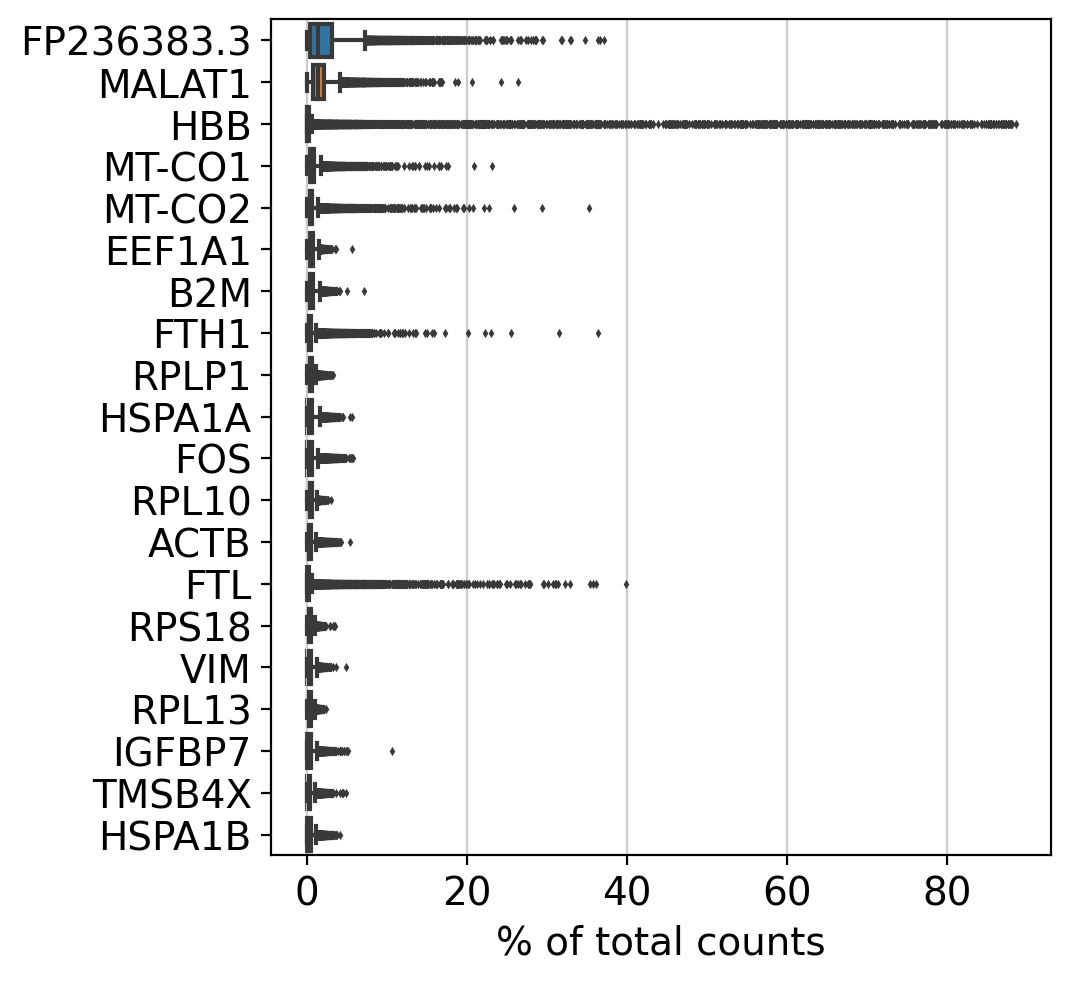

In [15]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [16]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/seaborn/categorical

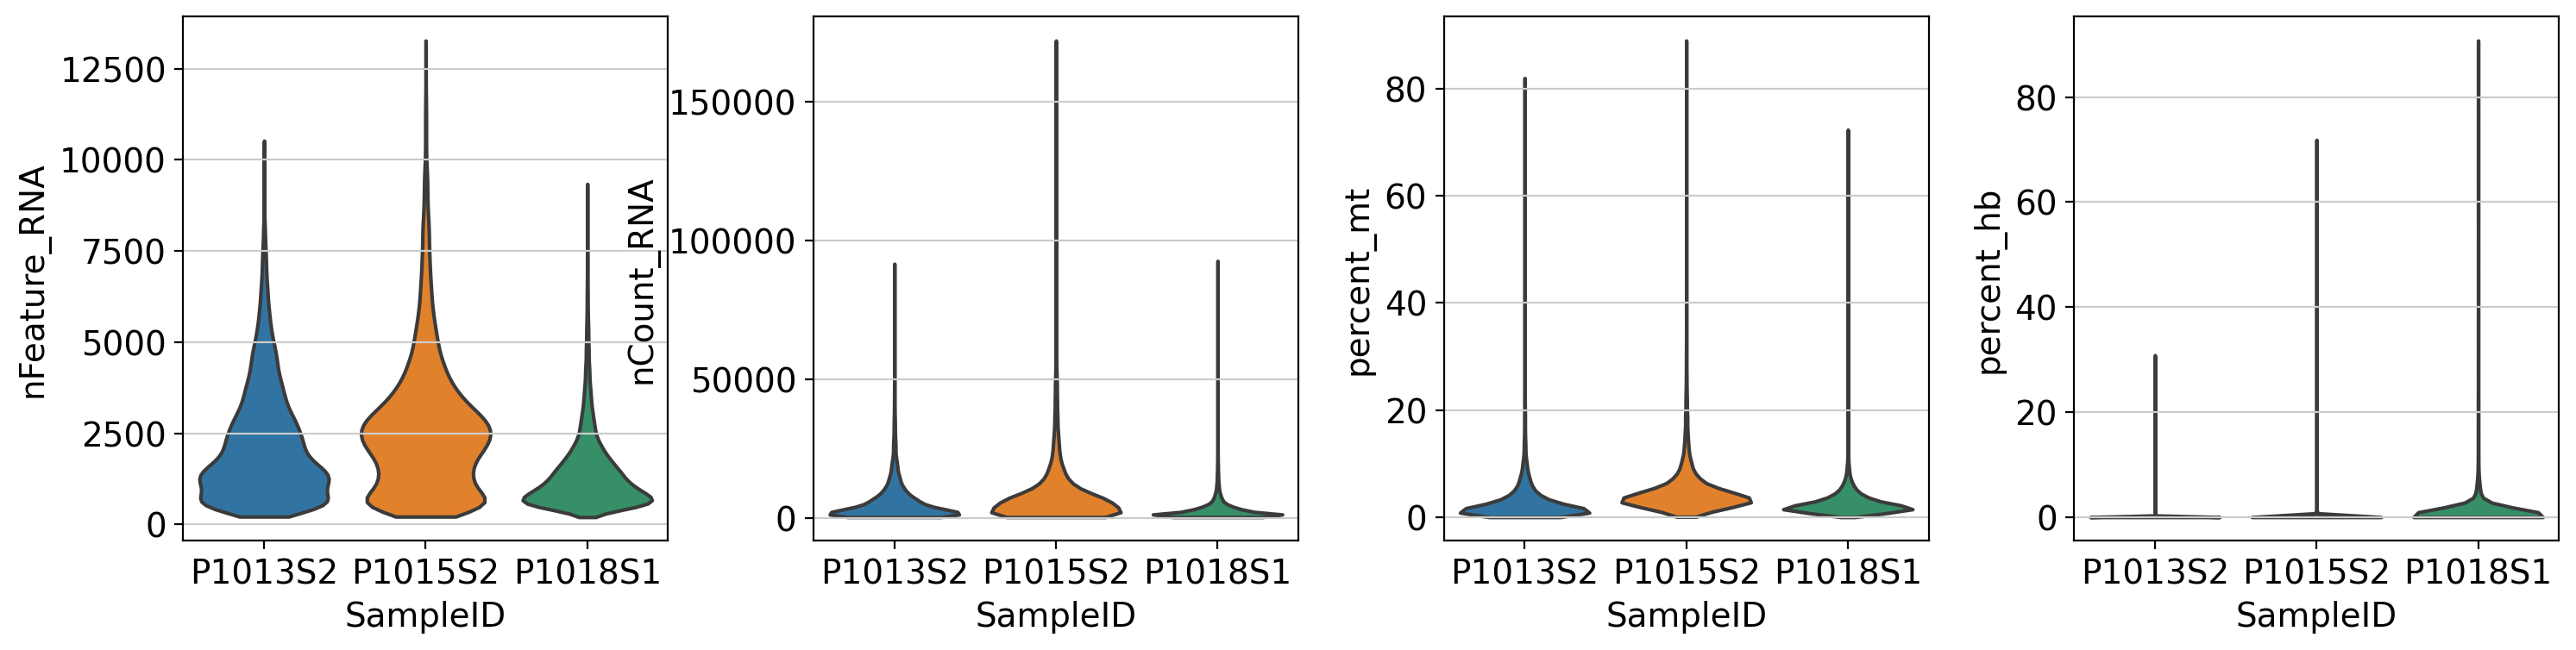

In [17]:
sc.pl.violin(adata, ['nFeature_RNA', 'nCount_RNA', 'percent_mt','percent_hb'],groupby='SampleID',
             jitter=0.4, multi_panel=True,stripplot=False)

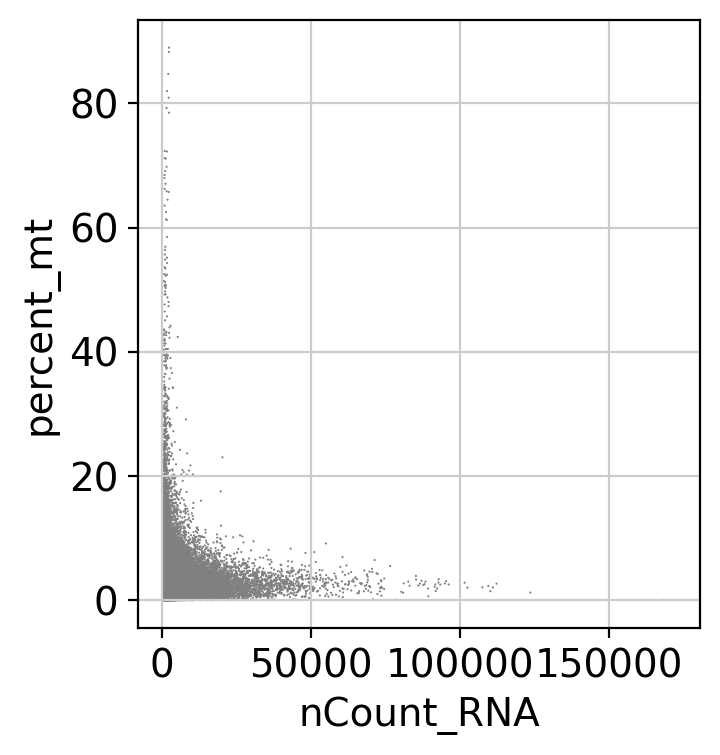

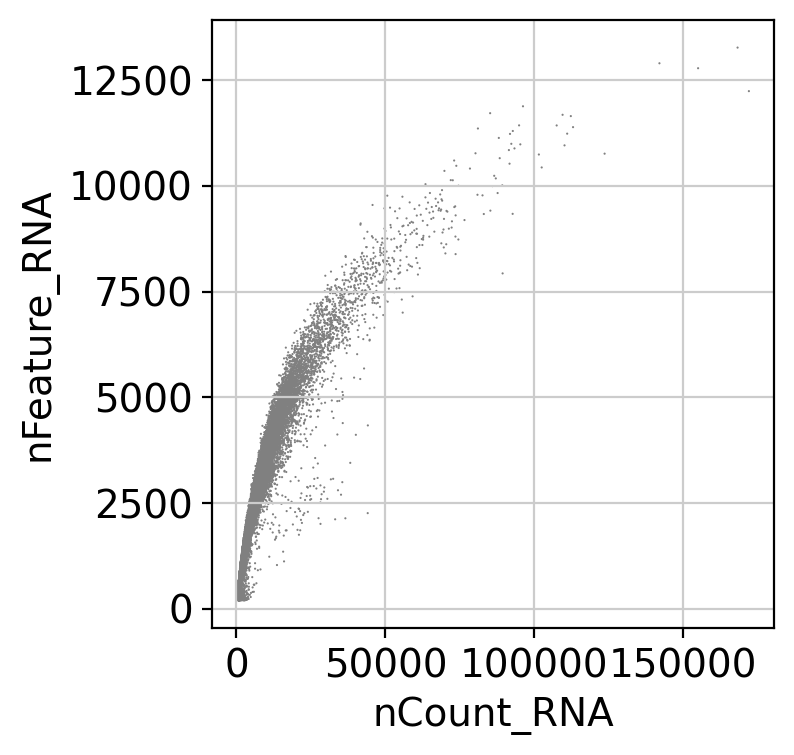

In [18]:
sc.pl.scatter(adata, x='nCount_RNA', y='percent_mt')
sc.pl.scatter(adata, x='nCount_RNA', y='nFeature_RNA')

In [19]:
adata.obs.groupby(['scDblFinder.class']).count()

/tmp/ipykernel_660076/1237599966.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby(['scDblFinder.class']).count()


orig.ident  nCount_RNA  nFeature_RNA  PatientID  \
scDblFinder.class                                                    
singlet                 43046       43046         43046      43046   
doublet                  6768        6768          6768       6768   

                   NeoChemoRes  NeoRadRes  SampleID  SampleTimepoint  \
scDblFinder.class                                                      
singlet                  43046      43046     43046            43046   
doublet                   6768       6768      6768             6768   

                   SampleMethod  SampleDate    Kit  scDblFinder.score  \
scDblFinder.class                                                       
singlet                   43046       43046  43046              43046   
doublet                    6768        6768   6768               6768   

                   percent_mt  percent_hb  S.Score  G2M.Score  Phase  batch  \
scDblFinder.class                                                             
singlet                 43046       43046    43046      43046  43046  43046   
doublet                  6768        6768     6768       6768   6768   6768   

                   n_genes  
scDblFinder.class           
singlet              43046  
doublet               6768

In [21]:
adata = adata[adata.obs.nFeature_RNA < 5000, :]
adata = adata[adata.obs.nCount_RNA < 20000, :]
adata = adata[adata.obs.nCount_RNA > 500,:]
adata = adata[adata.obs.percent_mt < 20, :]
adata = adata[adata.obs.percent_hb < 0.2, :]
adata = adata[adata.obs['scDblFinder.class'] == 'singlet', :]

/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/seaborn/categorical

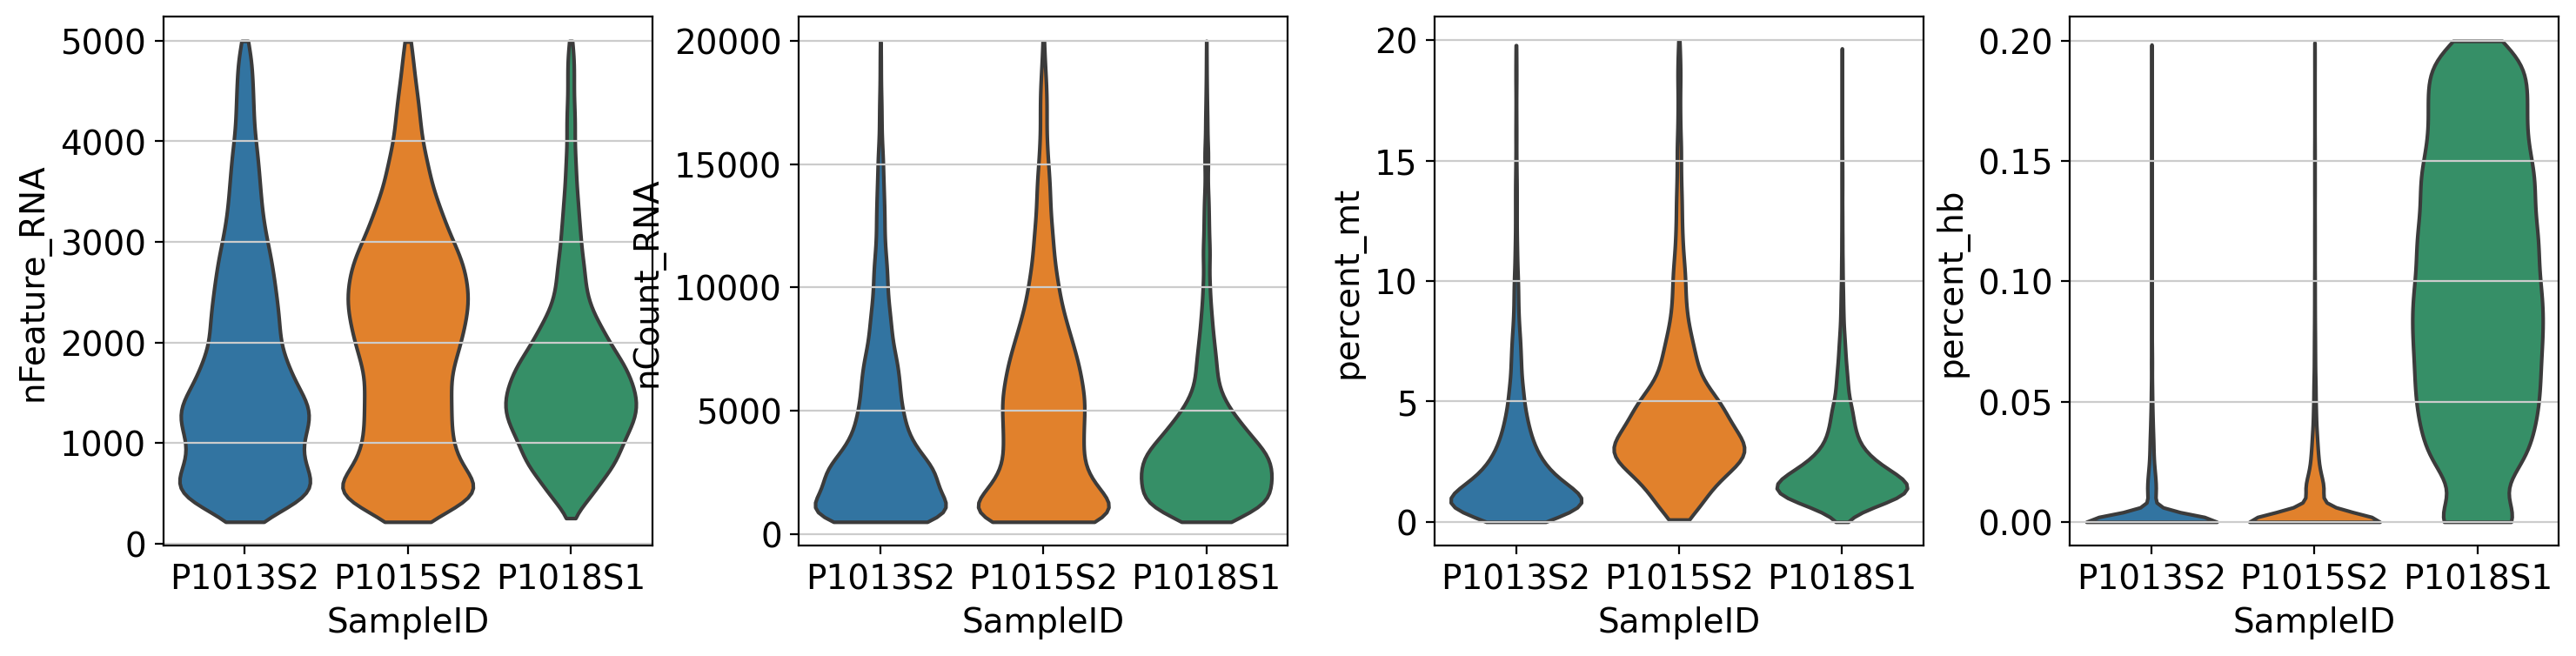

In [22]:
sc.pl.violin(adata, ['nFeature_RNA', 'nCount_RNA', 'percent_mt','percent_hb'],groupby='SampleID',
             jitter=0.4, multi_panel=True,stripplot=False)

In [23]:
adata.obs.groupby('SampleID')['percent_hb'].describe()

/tmp/ipykernel_660076/3355869019.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby('SampleID')['percent_hb'].describe()


count      mean       std  min       25%       50%       75%  \
SampleID                                                                   
P1013S2   11004.0  0.006872  0.019633  0.0  0.000000  0.000000  0.000000   
P1015S2    7498.0  0.008958  0.022159  0.0  0.000000  0.000000  0.010134   
P1018S1    9091.0  0.098568  0.055760  0.0  0.053586  0.096993  0.144300   

               max  
SampleID            
P1013S2   0.198413  
P1015S2   0.199203  
P1018S1   0.199920

In [24]:
adata.obs['SampleID'].value_counts()

SampleID
P1013S2    11004
P1018S1     9091
P1015S2     7498
Name: count, dtype: int64

In [25]:
adata.write_h5ad(resdir+'/cellranger_filter.h5ad')

In [26]:
adata.layers['count'] = adata.X.copy()

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata

/tmp/ipykernel_660076/2366724831.py:1: ImplicitModificationWarning: Setting element `.layers['count']` of view, initializing view as actual.
  adata.layers['count'] = adata.X.copy()


In [27]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
#sc.pl.highly_variable_genes(adata)

/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


In [28]:
#sc.pp.regress_out(adata, ['S_score', 'G2M_score'])
sc.pp.scale(adata)

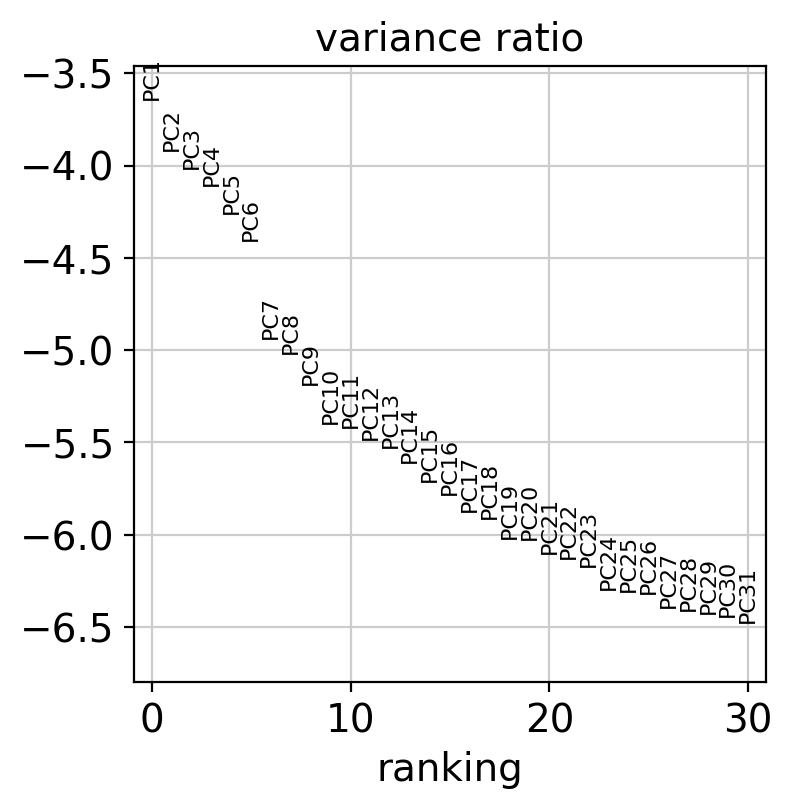

In [29]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)

### 1.3 Clustering

In [30]:
%%time
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=40)
sc.tl.umap(adata,min_dist=0.2)

CPU times: user 2min, sys: 2min 5s, total: 4min 6s
Wall time: 2min 44s


In [31]:
sc.tl.leiden(adata, resolution=0.1,key_added='leiden_0.1')
#sc.tl.leiden(adata, resolution=0.2,key_added='leiden_0.2')

In [32]:
adata.obs["leiden_0.1"].value_counts()

leiden_0.1
0     6495
1     5457
2     3089
3     2632
4     2518
5     2155
6     2074
7     1955
8      484
9      242
10     213
11     177
12     102
Name: count, dtype: int64

In [33]:
pd.crosstab(adata.obs['leiden_0.1'], adata.obs['SampleID'])

SampleID    P1013S2  P1015S2  P1018S1
leiden_0.1                           
0              2122     1396     2977
1              1340     2185     1932
2              3086        3        0
3               722     1488      422
4              1789      275      454
5               620     1203      332
6                 0        0     2074
7              1182      584      189
8                14       15      455
9                83        0      159
10               27      177        9
11                0      170        7
12               19        2       81

/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.ma

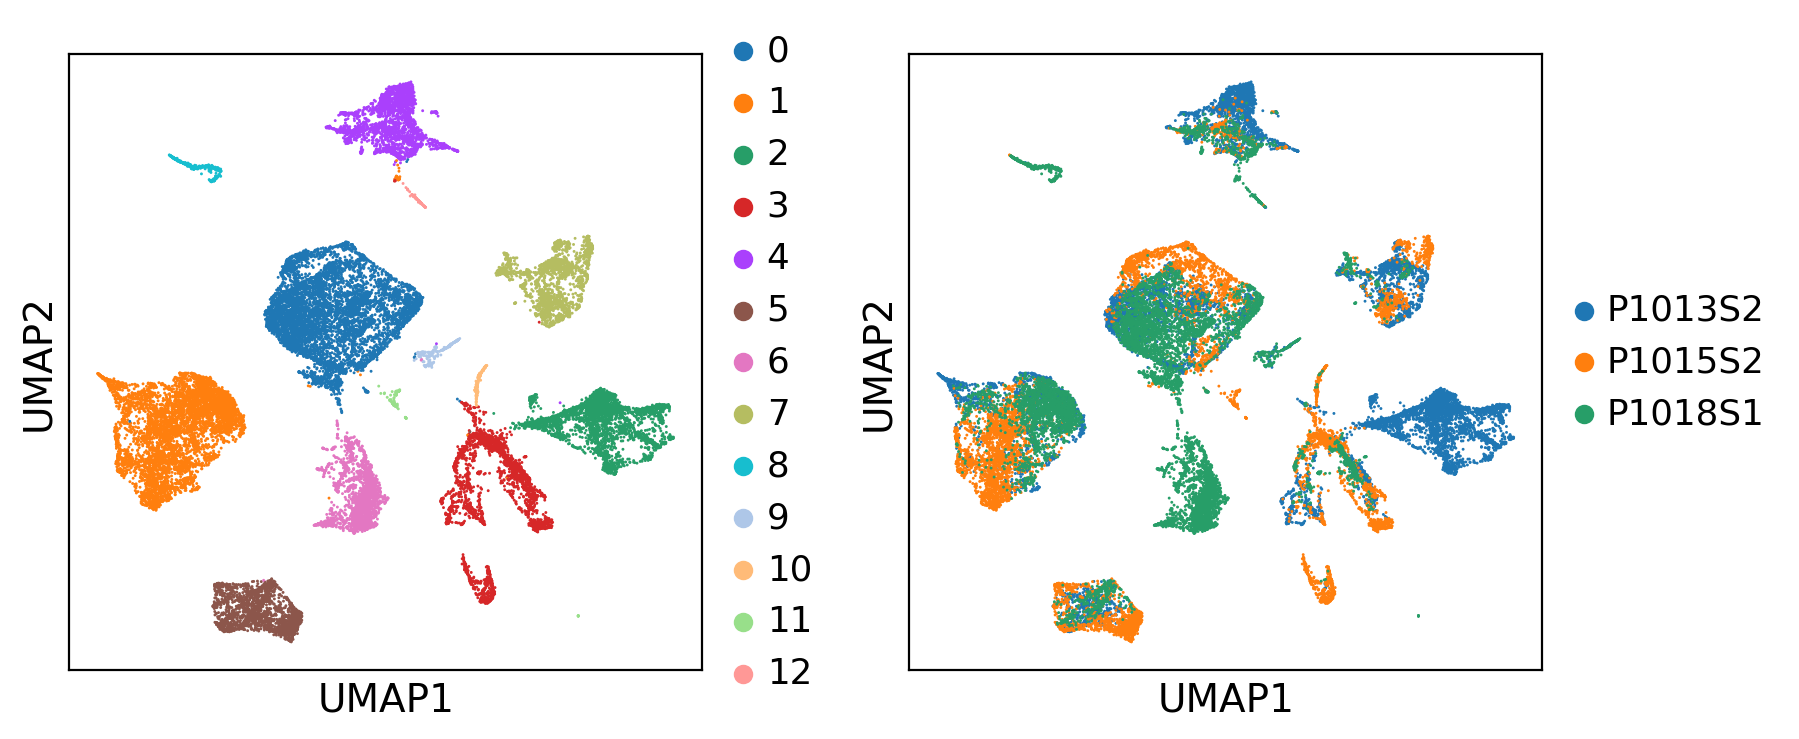

In [34]:
sc.pl.umap(adata, color=['leiden_0.1','SampleID'], title=['',''], frameon=True)

In [69]:
adata.write_h5ad(resdir+'/cellranger_cluster.h5ad')

#### 1.3.1 visualization

In [ ]:
# visualization.R

In [41]:
canonical_markers = {
    'Adipocyte' : ['ADIPOQ', 'FABP4', 'LEP'],
    'Endothelial' : ['VWF', 'CDH5', 'CLEC14A', 'CLDN5', 'ADGRL4'],
    'Epithelial' : ['EPCAM', 'KRT19', 'KRT7', 'KRT8'],
    'Fibroblast' : ['COL1A1', 'COL1A2', 'COL3A1', 'LUM'],
    'Neutrophil' : ['AZU1', 'CTSG', 'ELANE', 'MPO'],
    'Immune' : ['PTPRC'],
    'Effect' : ['PDCD1','CD274','CXCL13','TIGIT','GZMK','IL7R','LEF1','MKI67'],
    'T_cell' : ['CD2', 'CD3D', 'CD3E', 'CD4', 'CD8A'],
    'B_cell' : ['MS4A1', 'CD79A', 'CD79B'],
    'NK_cell' : ['NKG7', 'KLRD1', 'GZMB', 'KLRF1',"GNLY","TYROBP",'FCGR3A'],
    'Macrophage' : ['TREM2', 'FOLR2', 'SPP1', 'CD14', 'CD163'],
    'Mast' : ['CPA3', 'MS4A2', 'TPSB2'],
    'Monocyte' : ['CCR2', 'CSF1R',"FCN1", "CD14"],
    'Dendritic' : ['CCR7', 'CD86', 'CLEC10A'],
    "cDC1": ["CLEC9A", "CADM1","CST3","COTL1","LYZ"],
    "Normoblast": ["SLC4A1", "SLC25A37", "HBB", "HBA2", "HBA1", "TFRC"],
    "Erythroblast": ["MKI67", "HBA1", "HBB"],
    "ILC": ["ID2", "PLCG2", "GNLY", "SYNE1"],
    "Lymph prog": ["VPREB1","MME","EBF1","SSBP2","BACH2","CD79B",
        "IGHM","PAX5","PRKCE","DNTT","IGLL1",],
    "Naive CD20+ B": ["MS4A1", "IL4R", "IGHD", "FCRL1", "IGHM"],
    "B1 B": [
        "MS4A1",
        "SSPN",
        "ITGB1",
        "EPHA4",
        "COL4A4",
        "PRDM1",
        "IRF4",
        "CD38",
        "XBP1",
        "PAX5",
        "BCL11A",
        "BLK",
        "IGHD",
        "IGHM",
        "ZNF215",
    ],  # Note IGHD and IGHM are negative markers
    "Transitional B": ["MME", "CD38", "CD24", "ACSM3", "MSI2"],
    "Plasma cells": ["MZB1", "HSP90B1", "FNDC3B", "PRDM1", "IGKC", "JCHAIN"],
    "Plasmablast": ["XBP1", "RF4", "PRDM1", "PAX5"],  # Note PAX5 is a negative marker
    "CD4+ T activated": ["CD4", "IL7R", "TRBC2", "ITGB1"],
    "CD4+ T naive": ["CD4", "IL7R", "TRBC2", "CCR7"],
    "CD8+ T": ["CD8A", "CD8B", "GZMK", "GZMA", "CCL5", "GZMB", "GZMH", "GZMA"],
    "T activation": ["CD69", "CD38"],  # CD69 much better marker!
    "T naive": ["LEF1", "CCR7", "TCF7"],
    "pDC": ["GZMB", "IL3RA", "COBLL1", "TCF4"],
    "G/M prog": ["MPO", "BCL2", "KCNQ5", "CSF3R"],
    "HSC": ["NRIP1", "MECOM", "PROM1", "NKAIN2", "CD34"],
    "MK/E prog": [
        "ZNF385D",
        "ITGA2B",
        "RYR3",
        "PLCB1",
    ],  # Note PLCB1 is a negative marker

}


In [42]:
marker_genes_in_data = dict()
for ct, markers in canonical_markers.items():
    markers_found = list()
    for marker in markers:
        if marker in adata.var.index:
            markers_found.append(marker)
    marker_genes_in_data[ct] = markers_found


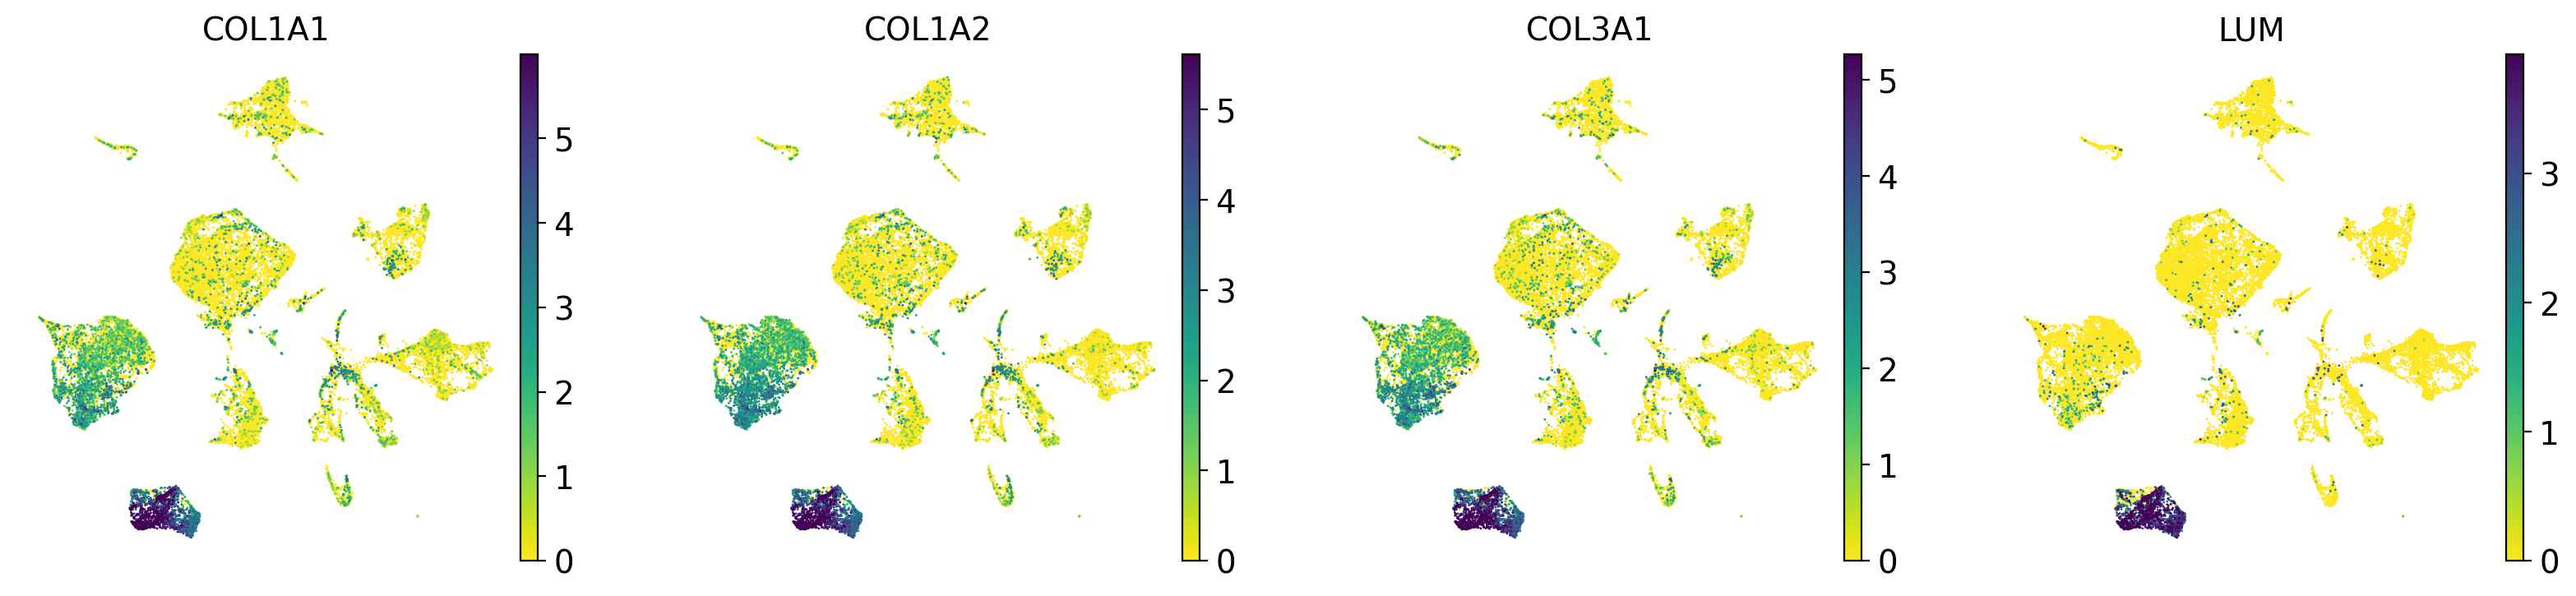

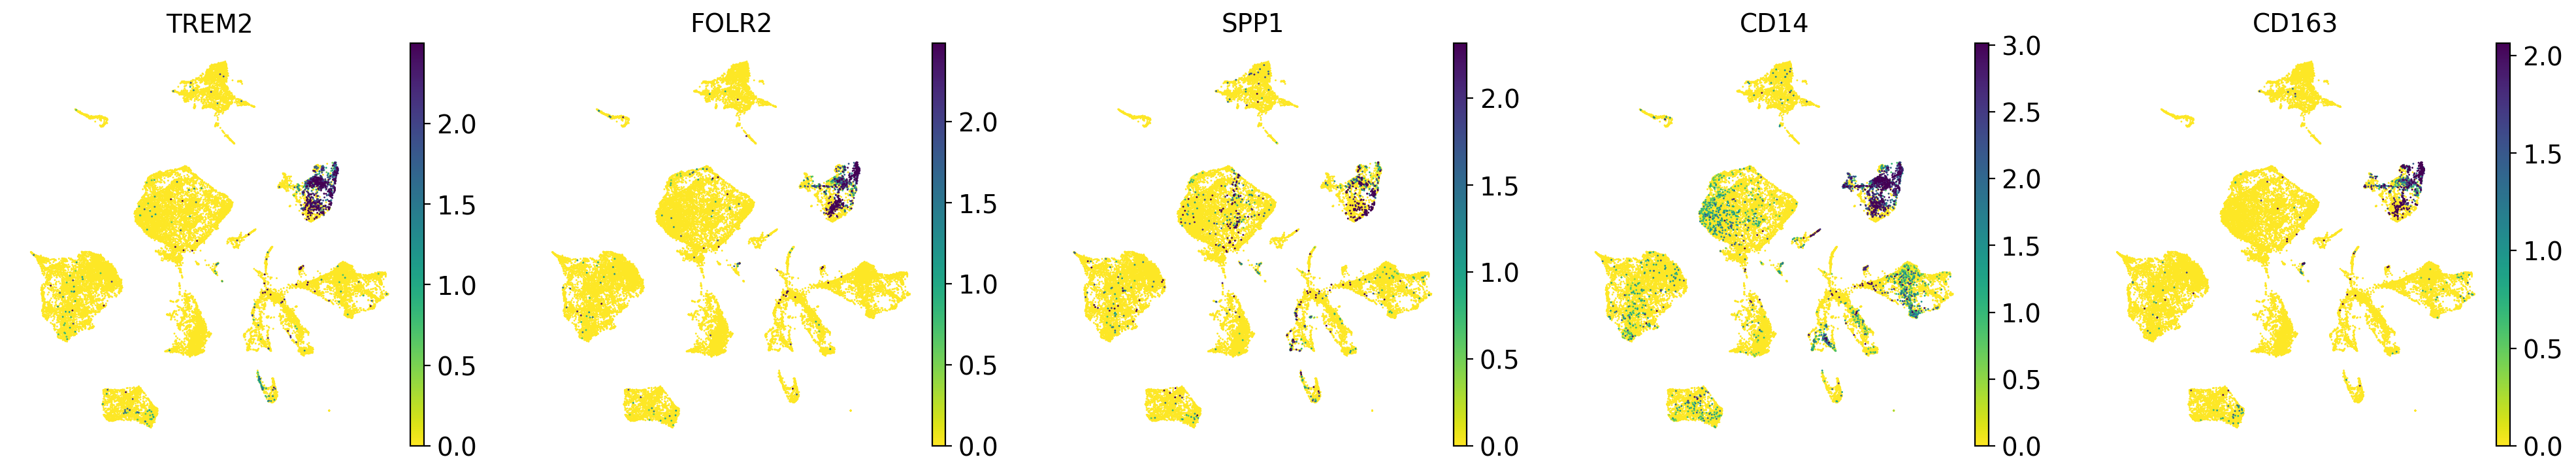

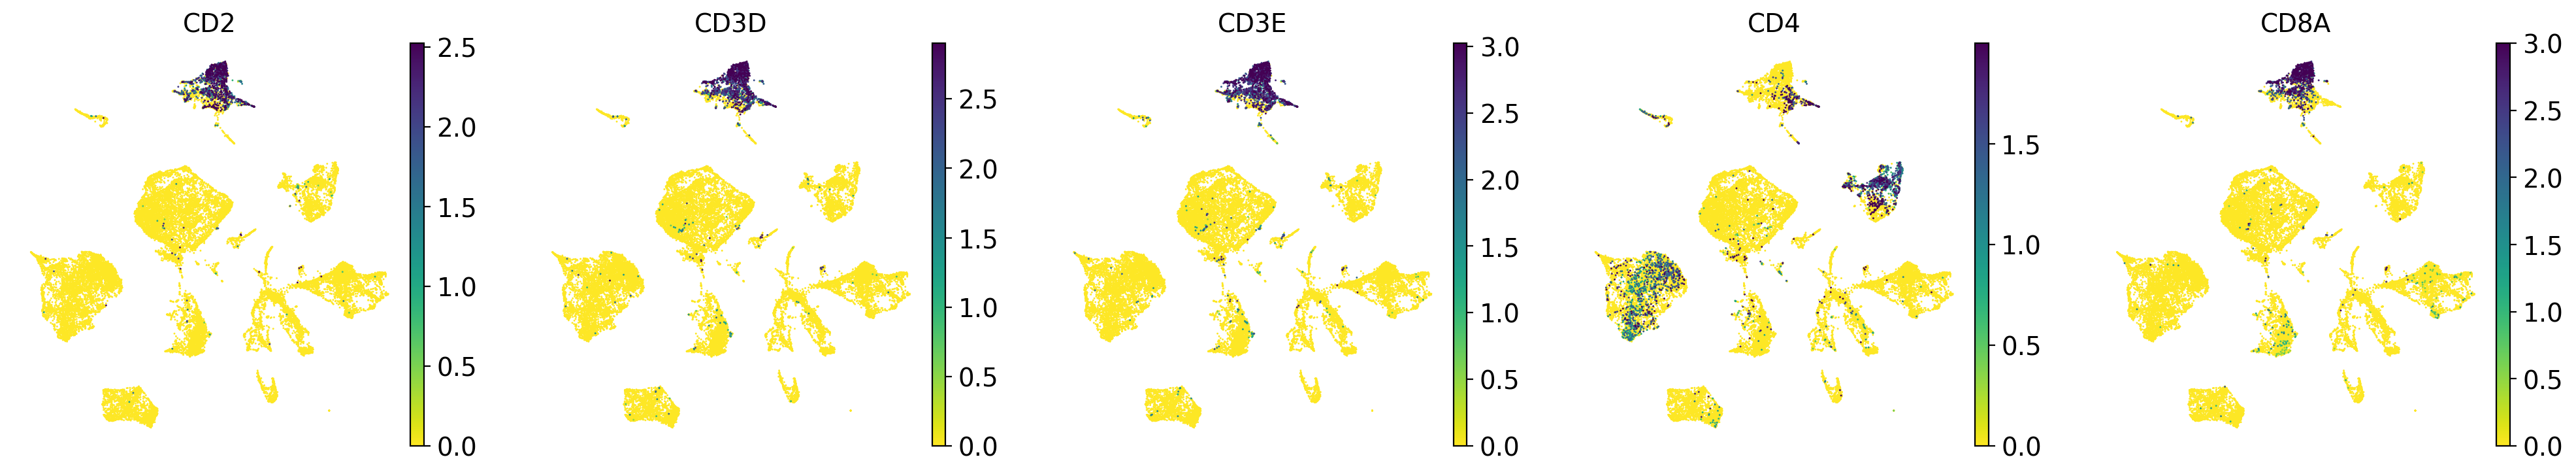

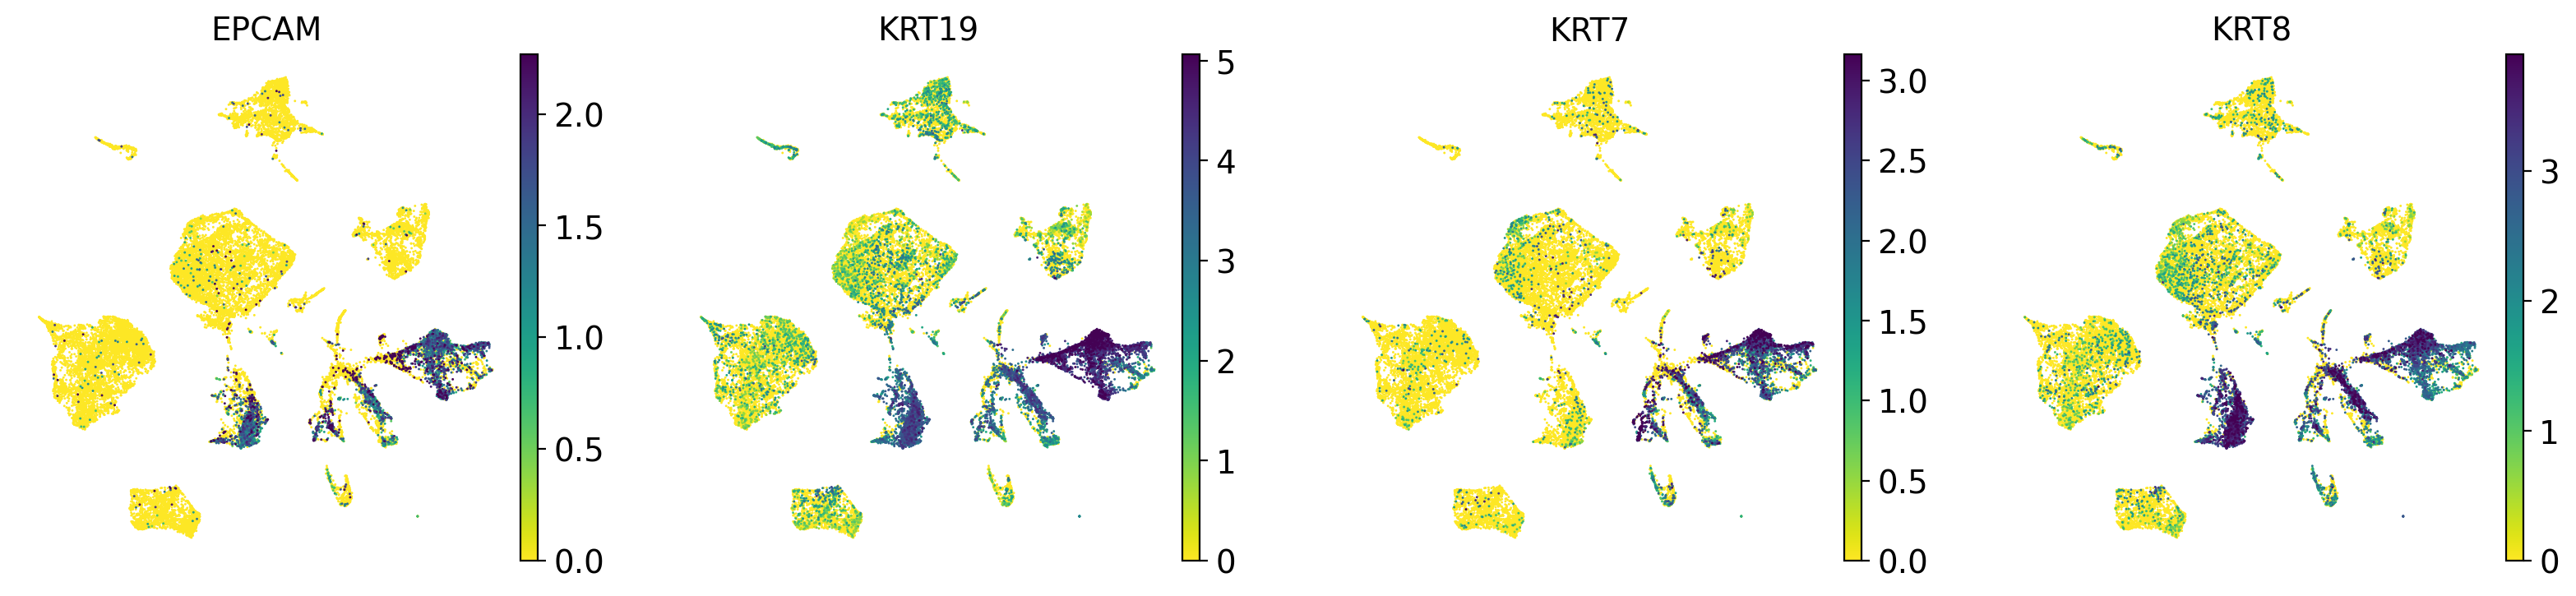

In [43]:
sc.pl.umap(adata, color=marker_genes_in_data['Fibroblast'], frameon=False, ncols=6, vmax='p99', use_raw=True)
sc.pl.umap(adata, color=marker_genes_in_data['Macrophage'], frameon=False, ncols=6, vmax='p99', use_raw=True)
sc.pl.umap(adata, color=marker_genes_in_data['T_cell'], frameon=False, ncols=6, vmax='p99', use_raw=True)
sc.pl.umap(adata, color=marker_genes_in_data['Epithelial'], frameon=False, ncols=6, vmax='p99', use_raw=True)

In [66]:
celltype = ['Endothelial','Epithelial','T_cell','B_cell','NK_cell','Macrophage','Mast','Monocyte','Dendritic','Normoblast','Fibroblast']
celltype_marker = {key: marker_genes_in_data[key] for key in celltype}

/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

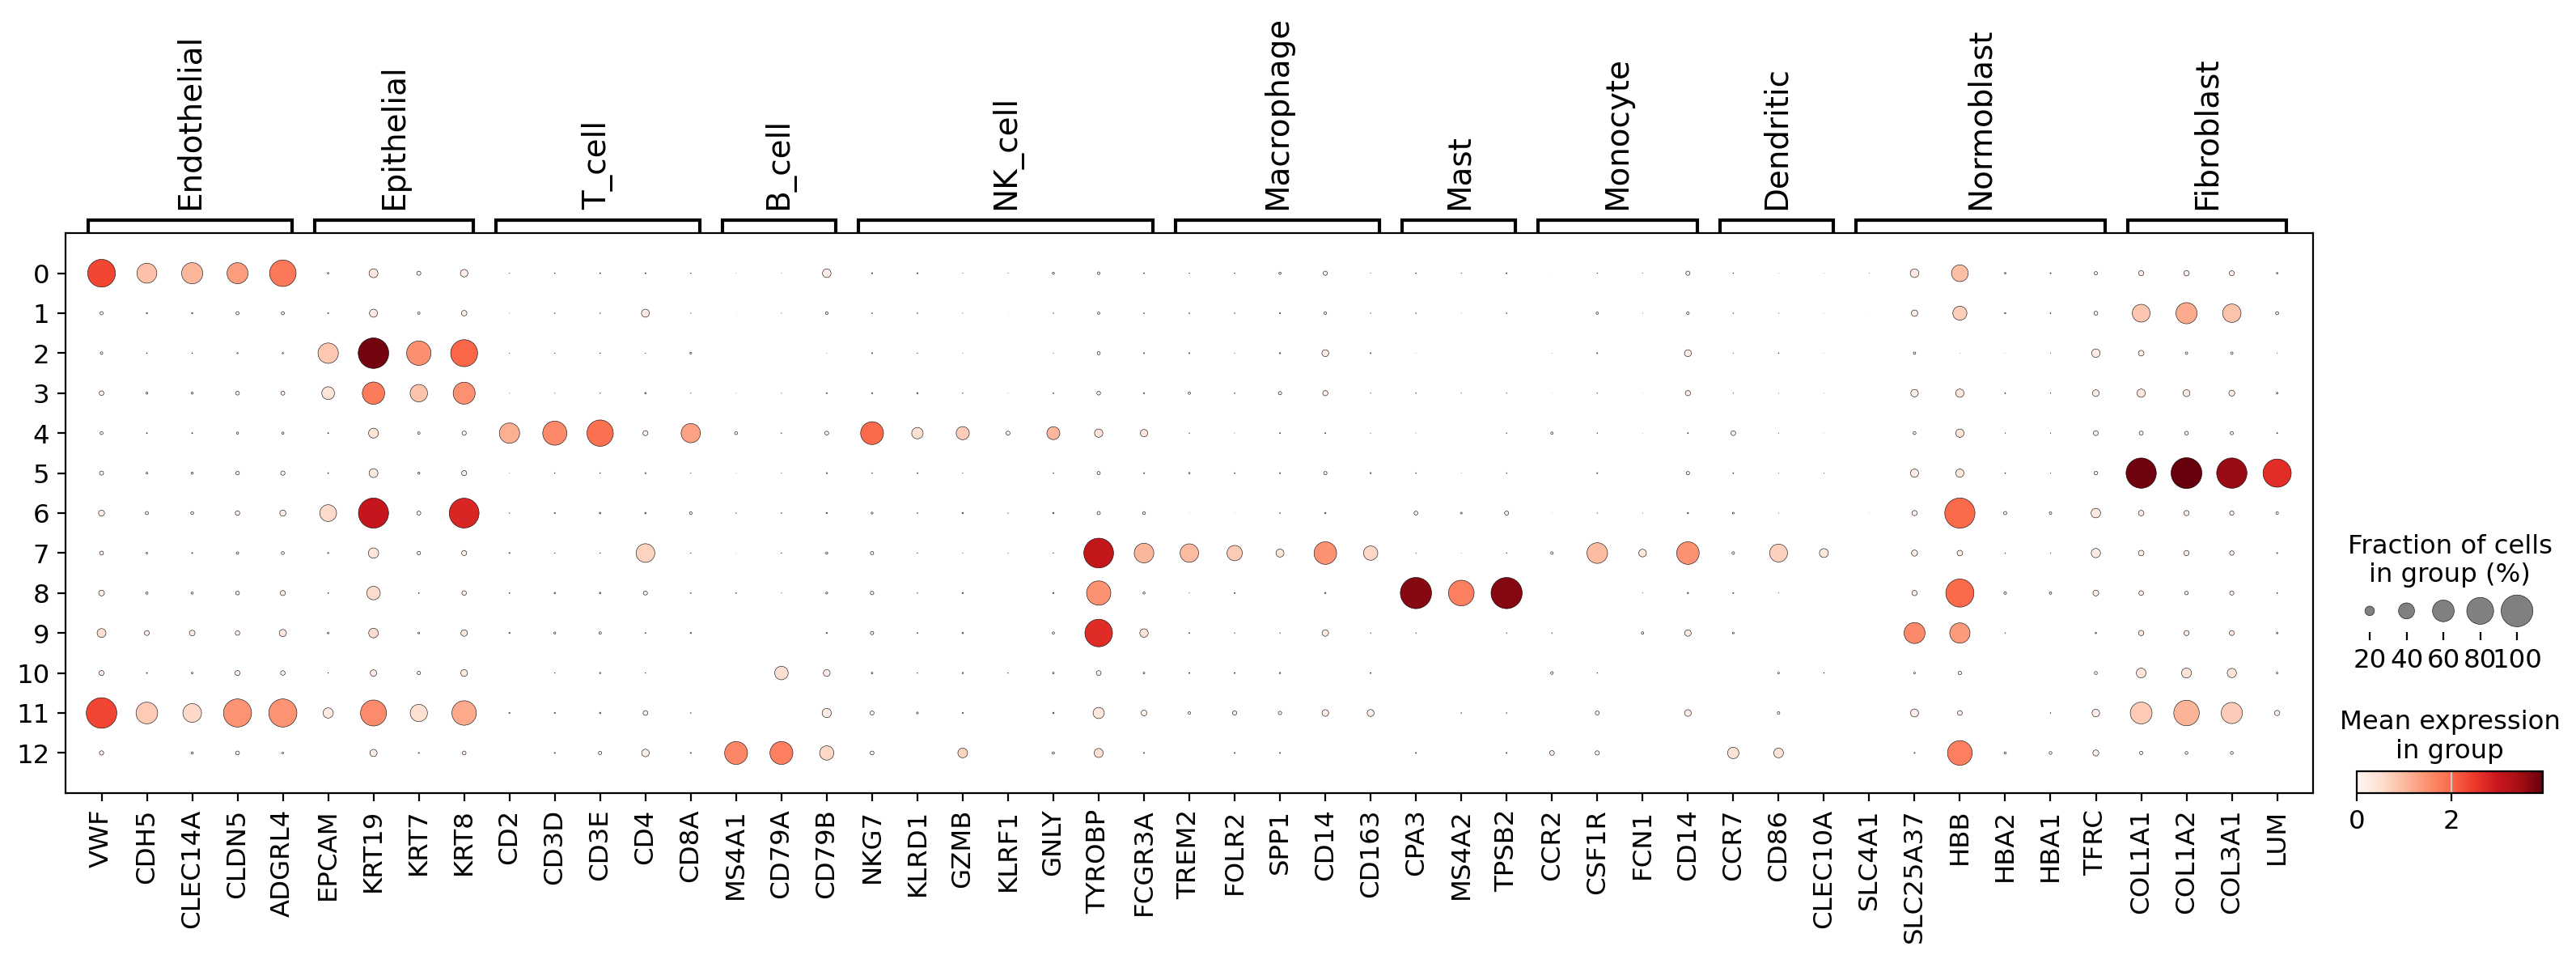

In [67]:
sc.pl.dotplot(adata, celltype_marker, 'leiden_0.1',dendrogram=False, swap_axes=False)

/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/scanpy/plotting/_stacked_violin.py:324: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  _color_df = _matrix.groupby(level=0).median()
/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/seaborn/categorical

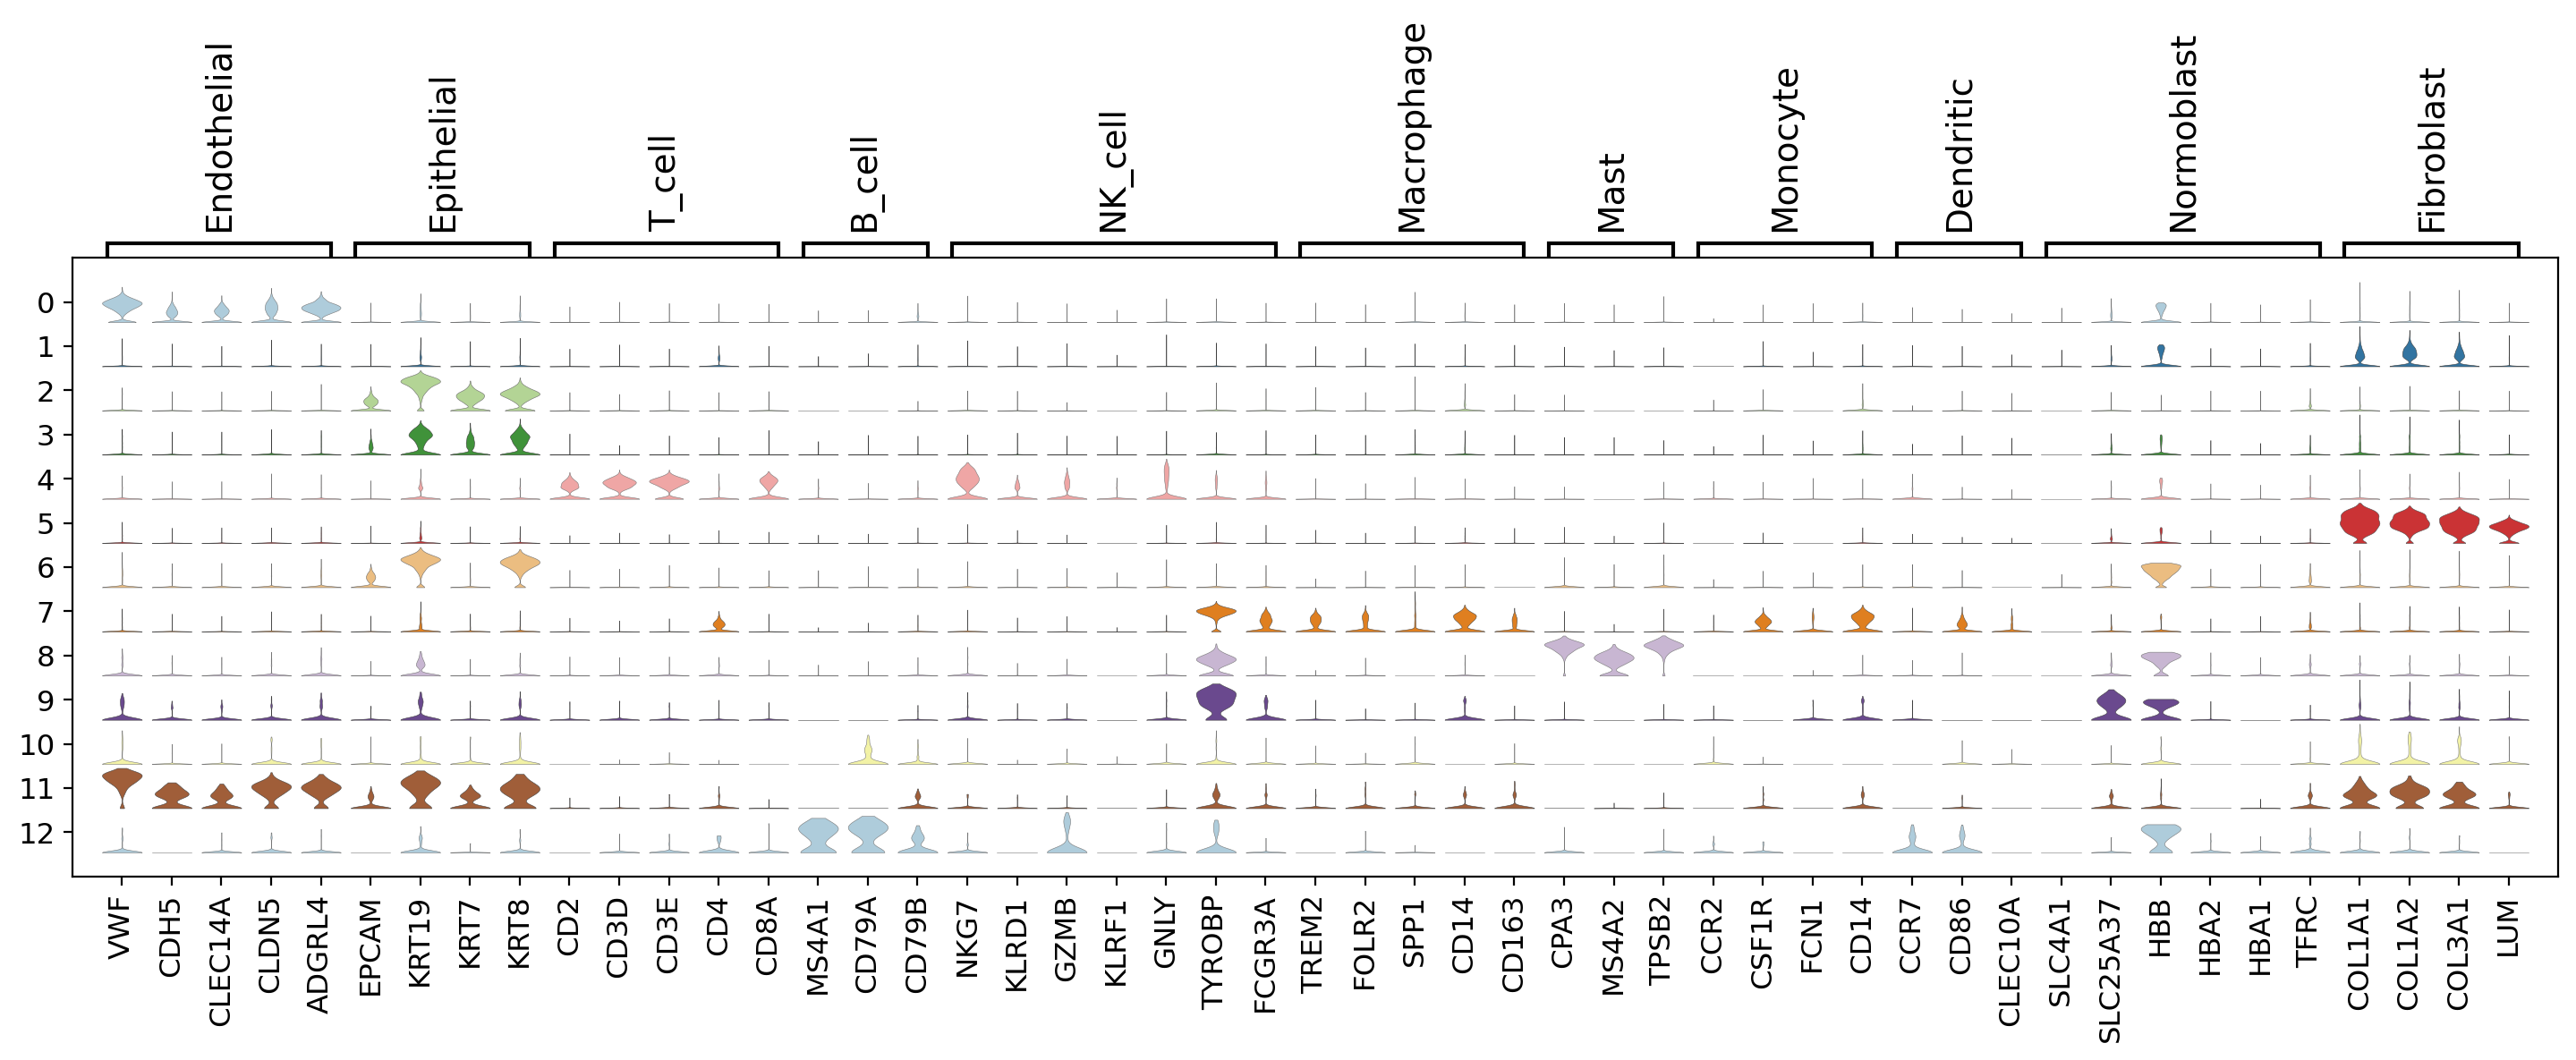

In [68]:
sc.pl.stacked_violin(adata, celltype_marker, groupby='leiden_0.1',
                     swap_axes=False, dendrogram=False,
                     row_palette='Paired')

### 1.4 celltype annotation

#### 1.4.1 manually

In [ ]:
adata = sc.read_h5ad(os.path.join(resdir,'cluster.h5ad'))

In [100]:
cl_annotation={
    "0": "Endothelial",
    "1": "Epithelial",
    "2": "Stromal",
    "3": "T cell",
    "4": "Macro/Mono",
    "5": "Fibroblast",
    "6": "Epithelial",
    "7": "Mast",
    "8": "B cell",
    "9": "undefined",
}

In [101]:
adata.obs["manual_celltype_annotation"] = adata.obs['harmony_leiden_0.1'].map(cl_annotation)

In [102]:
pd.crosstab(adata.obs['manual_celltype_annotation'],adata.obs['harmony_leiden_0.1'])

harmony_leiden_0.1             0     1     2     3     4     5     6    7  \
manual_celltype_annotation                                                  
B cell                         0     0     0     0     0     0     0    0   
Endothelial                 6587     0     0     0     0     0     0    0   
Epithelial                     0  6492     0     0     0     0  1153    0   
Fibroblast                     0     0     0     0     0  2182     0    0   
Macro/Mono                     0     0     0     0  2272     0     0    0   
Mast                           0     0     0     0     0     0     0  527   
Stromal                        0     0  5584     0     0     0     0    0   
T cell                         0     0     0  2567     0     0     0    0   
undefined                      0     0     0     0     0     0     0    0   

harmony_leiden_0.1            8  9  
manual_celltype_annotation          
B cell                      222  0  
Endothelial                   0  0  
Epithelial                    0  0  
Fibroblast                    0  0  
Macro/Mono                    0  0  
Mast                          0  0  
Stromal                       0  0  
T cell                        0  0  
undefined                     0  7

In [104]:
adata.obs['manual_celltype_annotation'].to_csv(os.path.join(resdir,'annotation','manual_annotation.csv'))

#### 1.4.2 celltypist

In [105]:
import celltypist

##### 1.4.2.1 model train

###### 1.4.2.1.1 BCatlas

In [ ]:
# ref: A single-cell and spatially resolved atlas of human breast cancer
bc_atlas_ref = sc.read_h5ad('/home/zhepan/Reference/BCatlas/BRCA4.h5ad')
bc_atlas_ref

In [ ]:
sc.pp.normalize_total(bc_atlas_ref, target_sum = 1e4)
sc.pp.log1p(bc_atlas_ref)

In [ ]:
sc.pp.highly_variable_genes(bc_atlas_ref, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [ ]:
bc_atlas_ref.obs.groupby('celltype_subset').apply(len)

In [ ]:
sampled_cell_index = celltypist.samples.downsample_adata(bc_atlas_ref, mode = 'each', n_cells = 1000, by = 'celltype_subset', return_index = True)
print(f"Number of downsampled cells for training: {len(sampled_cell_index)}")

In [ ]:
bc_atlas_ref[sampled_cell_index].obs.groupby('celltype_major').apply(len)

In [ ]:
# gene_index = np.argpartition(np.abs(model_fs.classifier.coef_), -300, axis = 1)[:, -300:]
# gene_index = np.unique(gene_index)
# print(f"Number of genes selected: {len(gene_index)}")

In [ ]:
%%time
#model = celltypist.train(bc_atlas_ref[sampled_cell_index, bc_atlas_ref.var.highly_variable], 'celltype_major', check_expression = False, n_jobs = 10, max_iter = 500)
#model.write('/home/zhepan/Reference/celltypist/celltype_major_from_BCatlas.pkl')
#model = celltypist.train(bc_atlas_ref[sampled_cell_index, bc_atlas_ref.var.highly_variable], 'celltype_minor', check_expression = False, n_jobs = 10, max_iter = 1000)
#model.write('/home/zhepan/Reference/celltypist/celltype_minor_from_BCatlas.pkl')
model = celltypist.train(bc_atlas_ref[sampled_cell_index, bc_atlas_ref.var.highly_variable], 'celltype_subset', check_expression = False, n_jobs = 10, max_iter = 1000)
model.write('/home/zhepan/Reference/celltypist/celltype_subset_from_BCatlas.pkl')

###### 1.4.2.1.2 HBCA

In [ ]:
# ref: A spatially resolved single-cell genomic atlas of the adult human breast
hbca = sc.read_h5ad('/home/zhepan/Reference/BCatlas/HBCA.h5ad')
hbca

In [ ]:
#sc.pp.normalize_total(hbca, target_sum = 1e4)
#sc.pp.log1p(hbca)
sc.pp.highly_variable_genes(hbca, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [ ]:
sampled_cell_index = celltypist.samples.downsample_adata(hbca, mode = 'each', n_cells = 1000, by = 'author_cell_type', return_index = True)
print(f"Number of downsampled cells for training: {len(sampled_cell_index)}")

In [ ]:
hbca[sampled_cell_index].obs.groupby('broad_cell_type').apply(len)

In [ ]:
%%time
#model = celltypist.train(hbca[sampled_cell_index, hbca.var.highly_variable], 'broad_cell_type', check_expression = False, n_jobs = 10, max_iter = 100)
#model.write('/home/zhepan/Reference/celltypist/broad_cell_type_from_HBCA.pkl')
#model = celltypist.train(hbca[sampled_cell_index, hbca.var.highly_variable], 'cell_type', check_expression = False, n_jobs = 10, max_iter = 500)
#model.write('/home/zhepan/Reference/celltypist/cell_type_from_HBCA.pkl')
model = celltypist.train(hbca[sampled_cell_index, hbca.var.highly_variable], 'author_cell_type', check_expression = False, n_jobs = 10, max_iter = 500)
model.write('/home/zhepan/Reference/celltypist/author_cell_type_from_HBCA.pkl')

In [ ]:
hbca_sn = sc.read_h5ad('/home/zhepan/Reference/BCatlas/HBCA_sn.h5ad')
hbca_sn

In [ ]:
#sc.pp.normalize_total(hbca_sn, target_sum = 1e4)
#sc.pp.log1p(hbca_sn)
sc.pp.highly_variable_genes(hbca_sn, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [ ]:
pd.crosstab(hbca_sn.obs['cell_type'], hbca_sn.obs['author_cell_type'])

In [ ]:
sampled_cell_index = celltypist.samples.downsample_adata(hbca_sn, mode = 'each', n_cells = 5000, by = 'author_cell_type', return_index = True)
print(f"Number of downsampled cells for training: {len(sampled_cell_index)}")

In [ ]:
hbca_sn[sampled_cell_index].obs.groupby('cell_type').apply(len)

In [ ]:
%%time
model = celltypist.train(hbca_sn[sampled_cell_index, hbca_sn.var.highly_variable], 'cell_type', check_expression = False, n_jobs = 10, max_iter = 500)
model.write('/home/zhepan/Reference/celltypist/cell_type_from_HBCAsn.pkl')

##### 1.4.2.2 predict

In [106]:
%%time
# CellTypist prediction with over-clustering and majority-voting.
predictions_BCatlas_major = celltypist.annotate(adata, model = '/home/zhepan/Reference/celltypist/celltype_major_from_BCatlas.pkl', majority_voting = True)
predictions_BCatlas_minor = celltypist.annotate(adata, model = '/home/zhepan/Reference/celltypist/celltype_minor_from_BCatlas.pkl', majority_voting = True)
predictions_BCatlas_subset = celltypist.annotate(adata, model = '/home/zhepan/Reference/celltypist/celltype_subset_from_BCatlas.pkl', majority_voting = True)
predictions_HBCA_broad_cell_type = celltypist.annotate(adata, model = '/home/zhepan/Reference/celltypist/broad_cell_type_from_HBCA.pkl', majority_voting = True)
predictions_HBCA_cell_type = celltypist.annotate(adata, model = '/home/zhepan/Reference/celltypist/cell_type_from_HBCA.pkl', majority_voting = True)
predictions_HBCA_author_cell_type = celltypist.annotate(adata, model = '/home/zhepan/Reference/celltypist/author_cell_type_from_HBCA.pkl', majority_voting = True)
#predictions_HBCA_sn = celltypist.annotate(adata, model = '/home/zhepan/Reference/celltypist/broad_cell_type_from_HBCA_sn.pkl', majority_voting = True)

👀 Invalid expression matrix in `.X`, expect log1p normalized expression to 10000 counts per cell; will use `.raw.X` instead
🔬 Input data has 27593 cells and 28938 genes
🔗 Matching reference genes in the model
🧬 2621 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 15
🗳️ Majority voting the predictions
✅ Majority voting done!
👀 Invalid expression matrix in `.X`, expect log1p normalized expression to 10000 counts per cell; will use `.raw.X` instead
🔬 Input data has 27593 cells and 28938 genes
🔗 Matching reference genes in the model
🧬 2621 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 15
🗳️ Majority voting th

CPU times: user 1min 53s, sys: 17 s, total: 2min 10s
Wall time: 2min 19s


In [107]:
predictions_BCatlas_major.predicted_labels.to_csv(os.path.join(resdir, 'annotation/predictions_BCatlas_major.csv'))
predictions_BCatlas_minor.predicted_labels.to_csv(os.path.join(resdir, 'annotation/predictions_BCatlas_minor.csv'))
predictions_BCatlas_subset.predicted_labels.to_csv(os.path.join(resdir, 'annotation/predictions_BCatlas_subset.csv'))
predictions_HBCA_broad_cell_type.predicted_labels.to_csv(os.path.join(resdir, 'annotation/predictions_HBCA_broad_cell_type.csv'))
predictions_HBCA_cell_type.predicted_labels.to_csv(os.path.join(resdir, 'annotation/predictions_HBCA_cell_type.csv'))
predictions_HBCA_author_cell_type.predicted_labels.to_csv(os.path.join(resdir, 'annotation/predictions_HBCA_author_cell_type.csv'))

In [108]:
pd.crosstab(predictions_BCatlas_major.predicted_labels['predicted_labels'],
            predictions_HBCA_broad_cell_type.predicted_labels['predicted_labels'])

predicted_labels   basal  bcells  fibroblasts  lumhr  lumsec  lymphatic  \
predicted_labels                                                          
B-cells                1      72            0      3       0          0   
CAFs                   3       2         2041     34       3          0   
Cancer Epithelial     11       3           14   4255      76          3   
Endothelial            1      11           29     52      12         36   
Myeloid                0       2            2     23       5          0   
Normal Epithelial    371      14           15   1507     582          0   
PVL                    5       2           50     28       8          0   
Plasmablasts           0     148            0      4       0          0   
T-cells                4      11            8     83      10          1   

predicted_labels   myeloid  pericytes  tcells  vascular  
predicted_labels                                         
B-cells                 12          2       1         2  
CAFs                    10         60       3        26  
Cancer Epithelial       44         86      15        79  
Endothelial             23        102      11      6803  
Myeloid               2042          3       1        17  
Normal Epithelial       21         46       6        78  
PVL                     23       5525      10        33  
Plasmablasts             1          0       0         3  
T-cells                393         15    2529        23

#### 1.4.3 celltype annotation matrix generate

In [ ]:
# anno_info.R

In [ ]:
# use ref from zemin zhang pan-cancer data help to annotate immune cell subset

#### 1.4.4 InferCNV 

Identify tumor cell from epitheial cell

In [ ]:
# infercnv.R

### 1.5 Integration

#### 1.5.1 scVI

In [ ]:
# scANVI.ipynb

#### 1.5.2 Harmony

In [ ]:
# harmony.R

In [70]:
import scanpy.external as sce

In [71]:
adata

AnnData object with n_obs × n_vars = 27593 × 28938
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'PatientID', 'NeoChemoRes', 'NeoRadRes', 'SampleID', 'SampleTimepoint', 'SampleMethod', 'SampleDate', 'Kit', 'scDblFinder.score', 'scDblFinder.class', 'percent_mt', 'percent_hb', 'S.Score', 'G2M.Score', 'Phase', 'batch', 'n_genes', 'leiden_0.1'
    var: 'name-0', 'name-1', 'name-2', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'SampleID_colors', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_0.1_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'distances', 'connectivities'

In [72]:
sce.pp.harmony_integrate(adata, 'SampleID')

2023-12-04 15:58:01,081 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-12-04 16:01:49,307 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-12-04 16:01:49,798 - harmonypy - INFO - Iteration 1 of 10
2023-12-04 16:03:20,351 - harmonypy - INFO - Iteration 2 of 10
2023-12-04 16:05:27,116 - harmonypy - INFO - Iteration 3 of 10
2023-12-04 16:07:37,678 - harmonypy - INFO - Iteration 4 of 10
2023-12-04 16:09:37,933 - harmonypy - INFO - Iteration 5 of 10
2023-12-04 16:11:45,122 - harmonypy - INFO - Iteration 6 of 10
2023-12-04 16:13:52,097 - harmonypy - INFO - Iteration 7 of 10
2023-12-04 16:16:00,517 - harmonypy - INFO - Converged after 7 iterations


In [73]:
sc.pp.neighbors(adata, use_rep='X_pca_harmony')
sc.tl.leiden(adata, resolution=0.1, key_added='harmony_leiden_0.1')
sc.tl.umap(adata,min_dist=0.2)

In [ ]:
adata

In [74]:
pd.crosstab(adata.obs['harmony_leiden_0.1'], adata.obs['SampleID'])

SampleID            P1013S2  P1015S2  P1018S1
harmony_leiden_0.1                           
0                      2134     1553     2900
1                      3402      884     2206
2                      1347     2172     2065
3                      1793      266      508
4                      1278      622      372
5                       615     1201      366
6                       389      609      155
7                        17       15      495
8                        29      176       17
9                         0        0        7

In [75]:
adata.obs['harmony_leiden_0.1'].value_counts()

harmony_leiden_0.1
0    6587
1    6492
2    5584
3    2567
4    2272
5    2182
6    1153
7     527
8     222
9       7
Name: count, dtype: int64

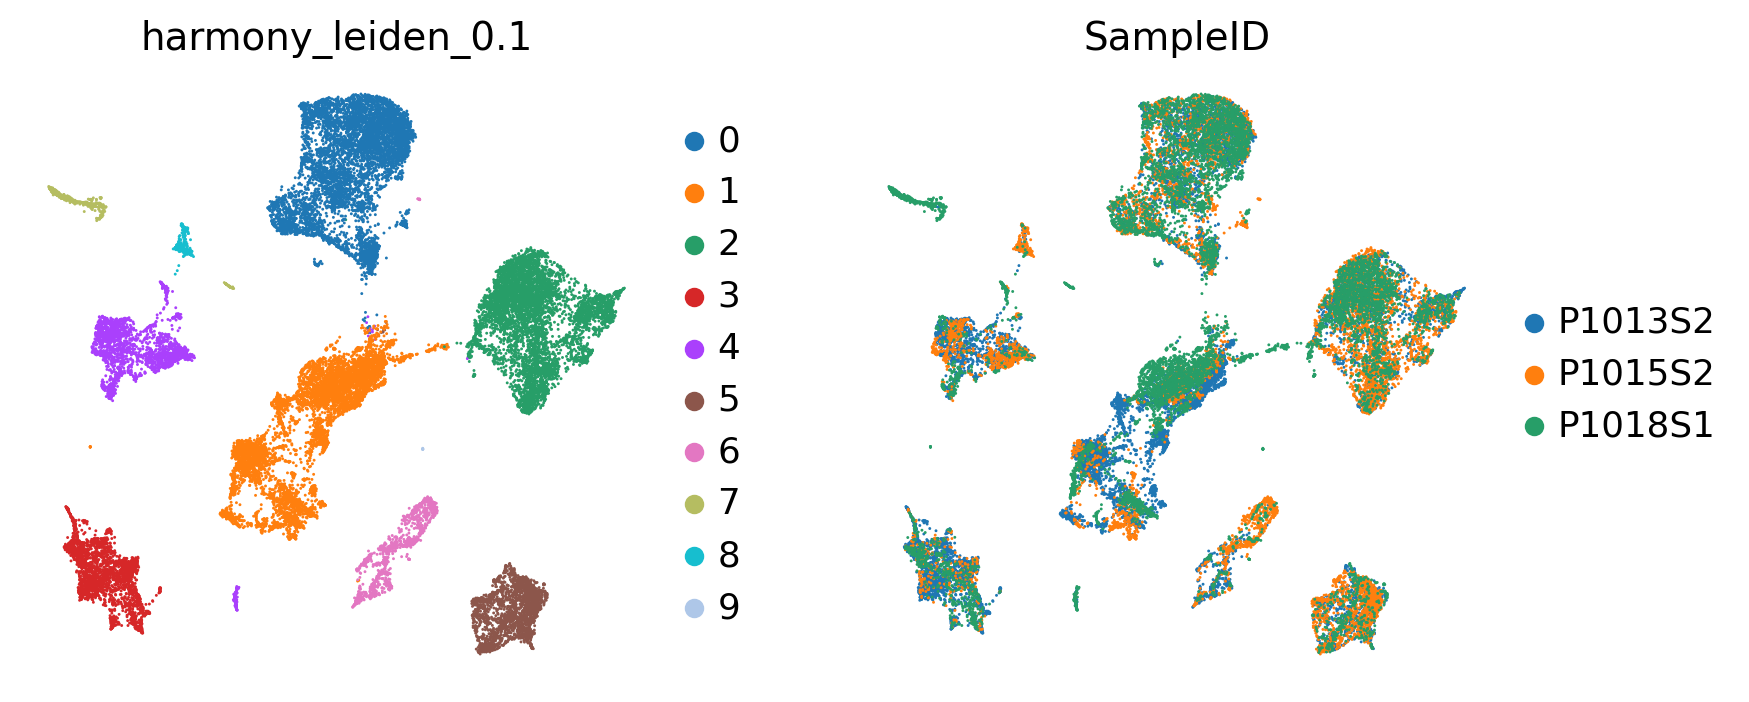

In [130]:
sc.pl.umap(adata, color=["harmony_leiden_0.1", "SampleID"], frameon=False, ncols=2)

/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

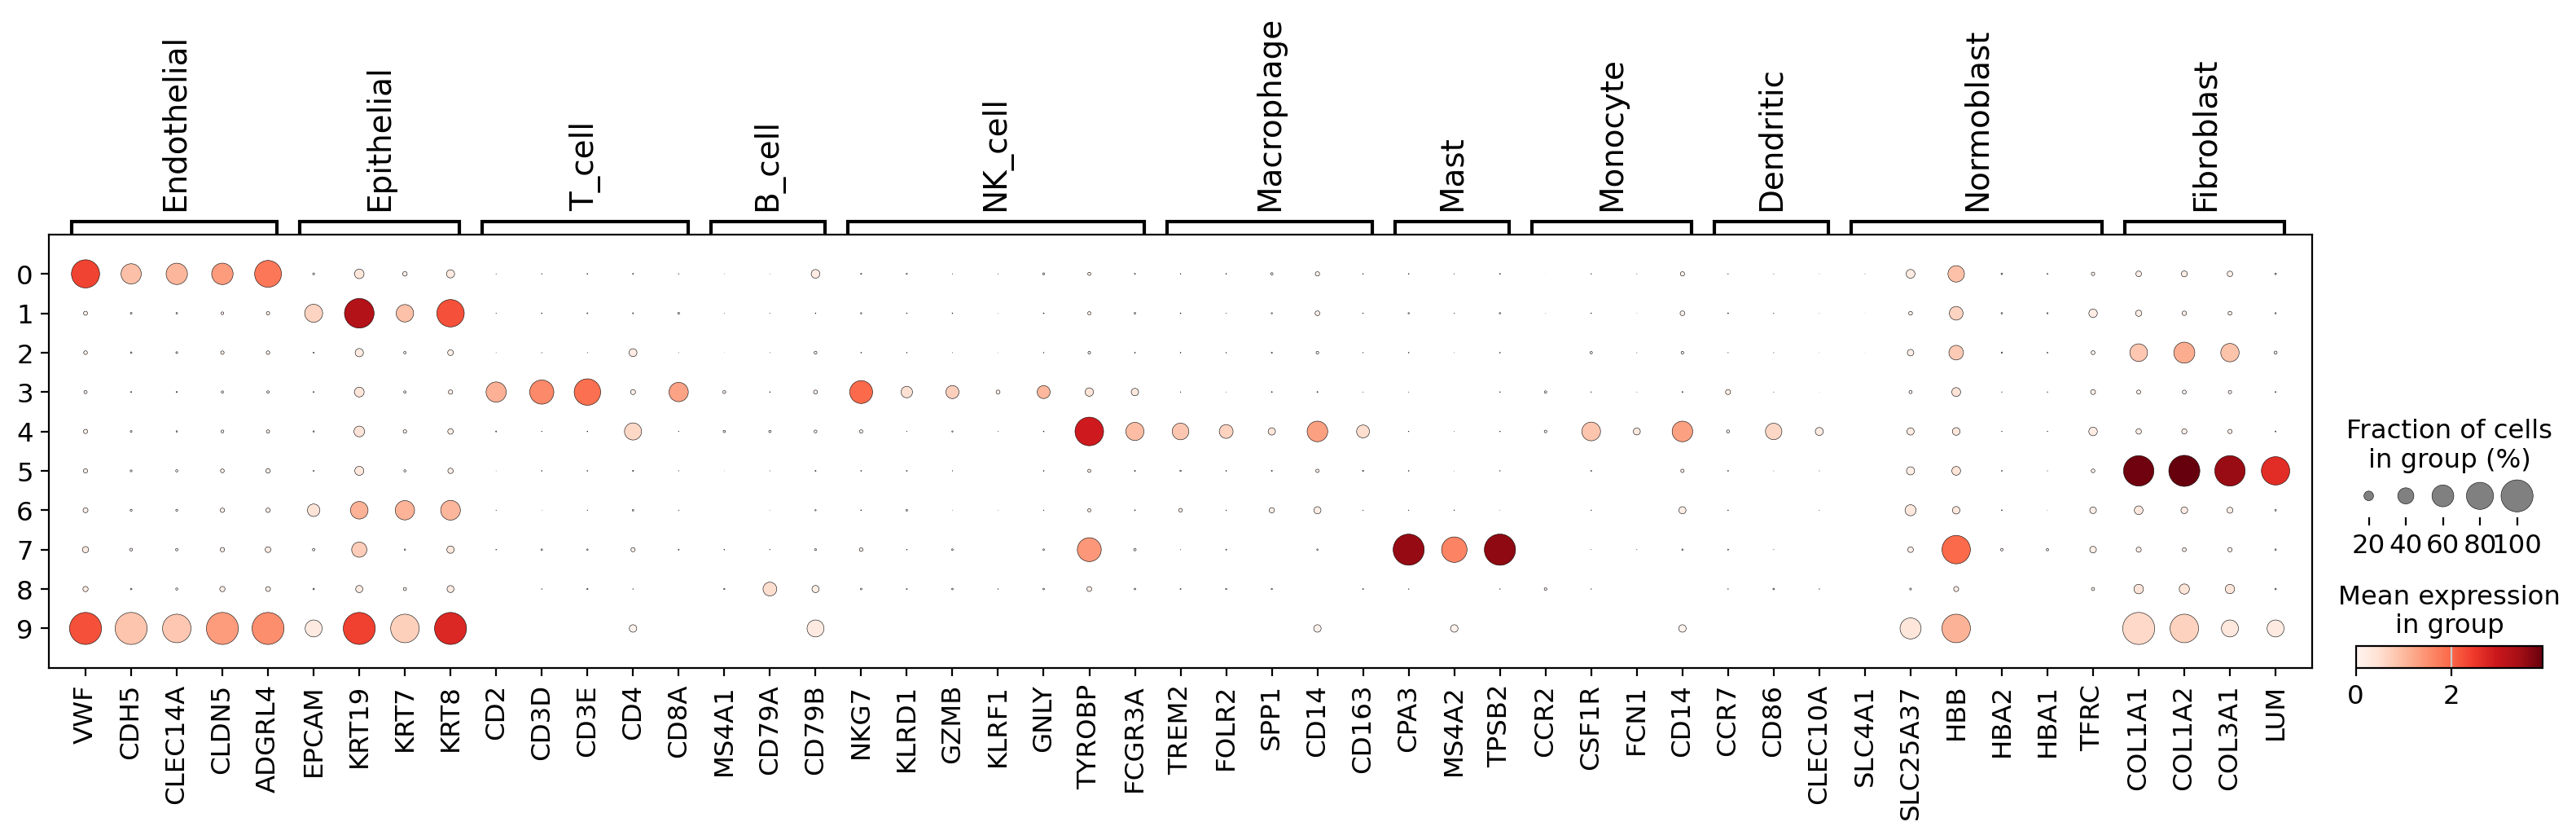

In [79]:
sc.pl.dotplot(adata, celltype_marker, 'harmony_leiden_0.1',dendrogram=False, swap_axes=False)

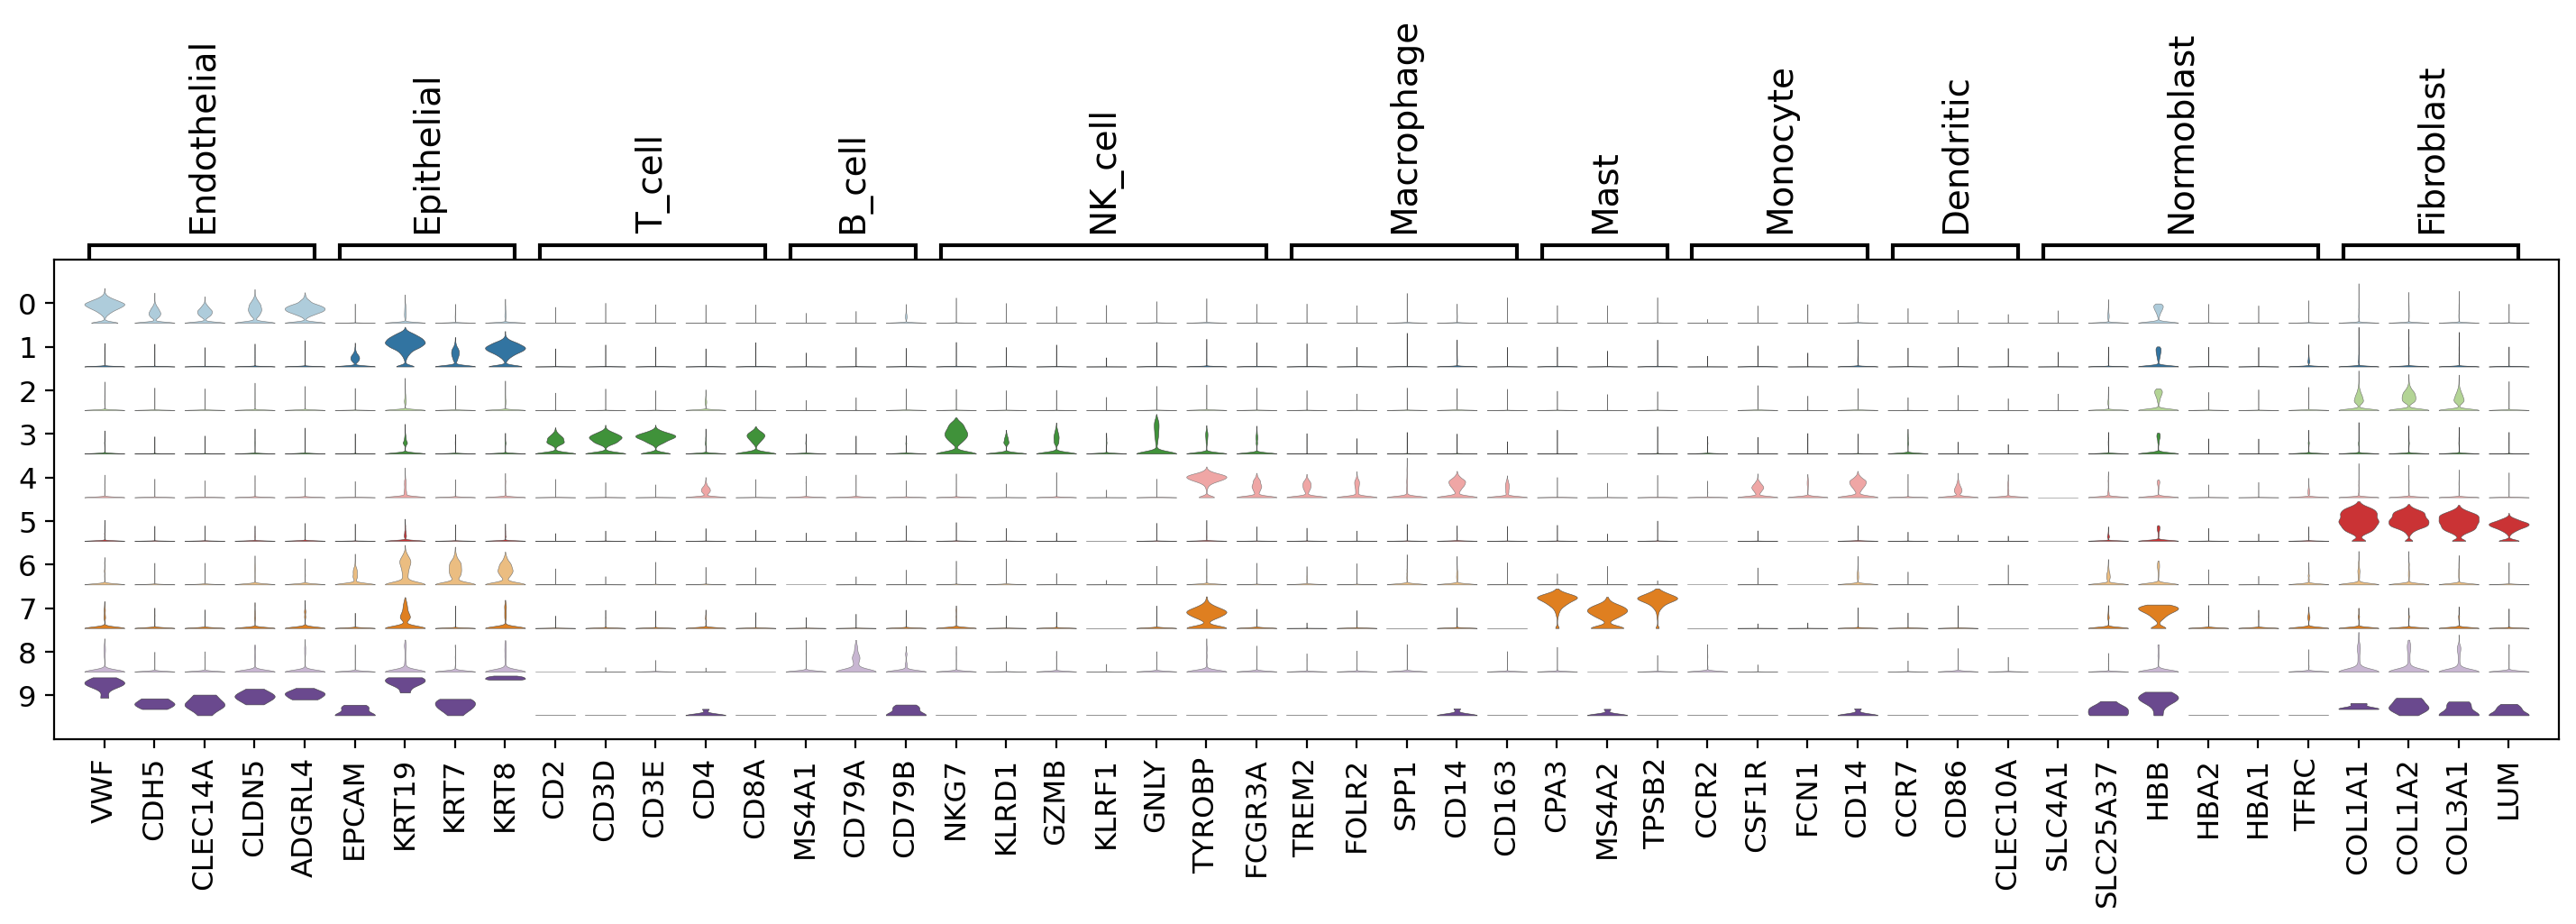

In [137]:
sc.pl.stacked_violin(adata, celltype_marker, groupby='harmony_leiden_0.1',
                     swap_axes=False, dendrogram=False,
                     row_palette='Paired')

In [81]:
adata.write_h5ad(os.path.join(resdir,'harmony.h5ad'))

### 1.6 DE

In [82]:
sc.tl.rank_genes_groups(adata, 'harmony_leiden_0.1', method='wilcoxon')
sc.tl.filter_rank_genes_groups(adata, min_fold_change=2)

/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
df_markers = sc.get.rank_genes_groups_df(adata, group=adata.obs['harmony_leiden_0.1'].unique(), key='rank_genes_groups_filtered')
df_markers = df_markers.loc[~ df_markers.names.isna()]
df_markers.to_csv(resdir + 'markers.csv')

In [84]:
df_markers[df_markers['group'] == '8'].head(10)['names']  # group 3 marker genes

231504      IGKC
231506    JCHAIN
231507      MZB1
231508     IGHG1
231509     DERL3
231510    TXNDC5
231511     IGHA1
231512    FKBP11
231513    SEC11C
231514     ITM2C
Name: names, dtype: object

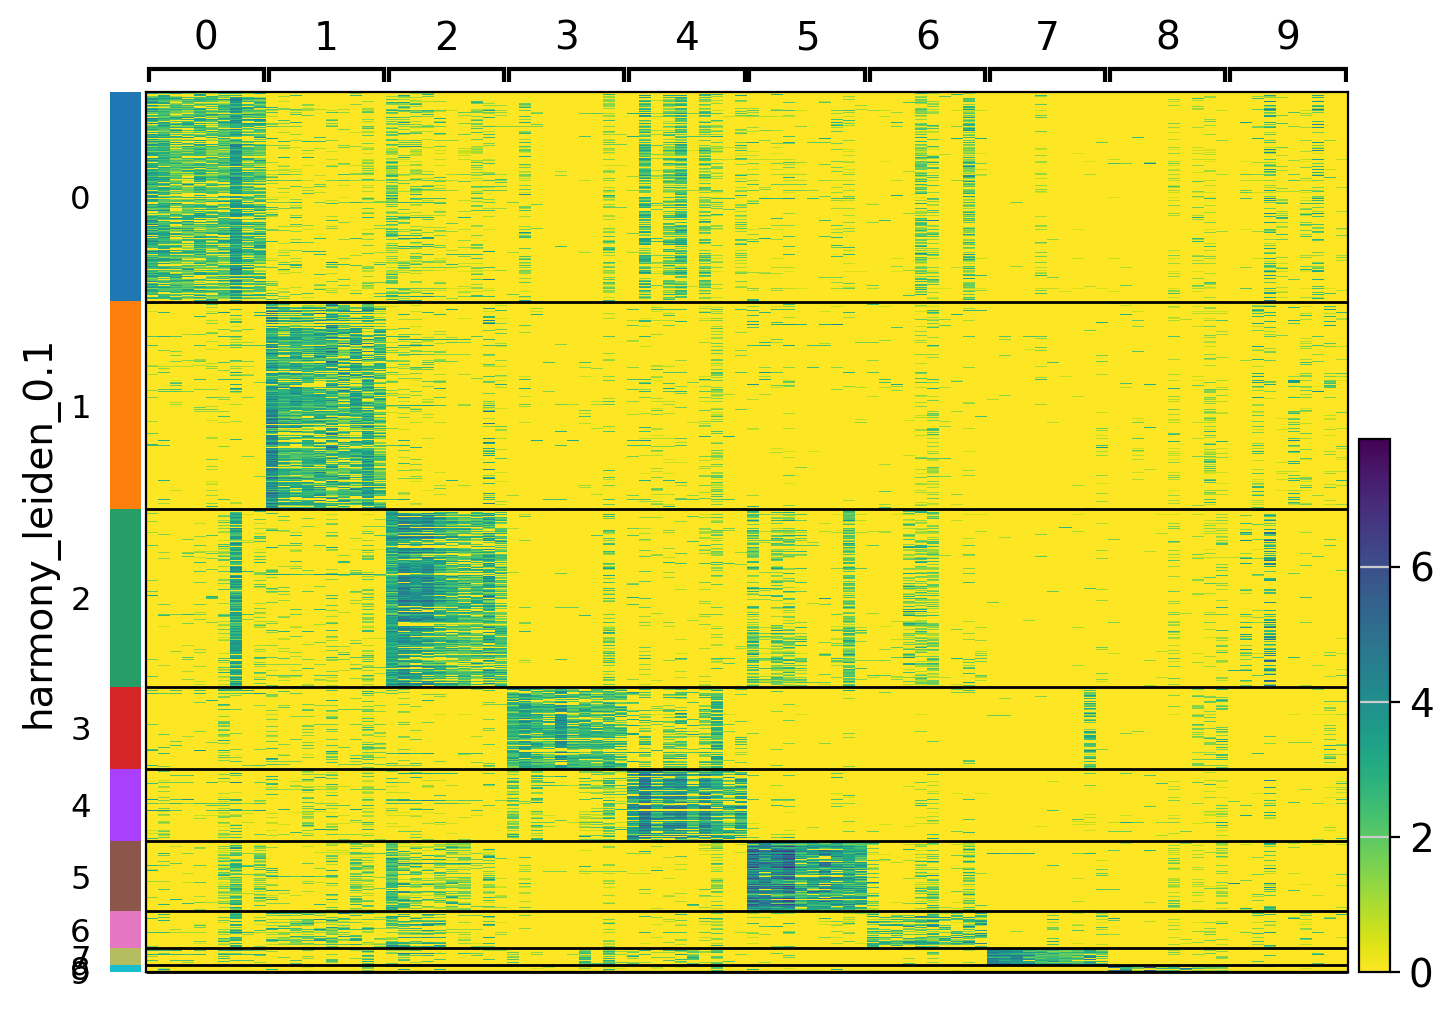

In [92]:
sc.pl.rank_genes_groups_heatmap(adata, key='rank_genes_groups_filtered',dendrogram=False)

/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/zhepan/miniconda3/envs/scRNA/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

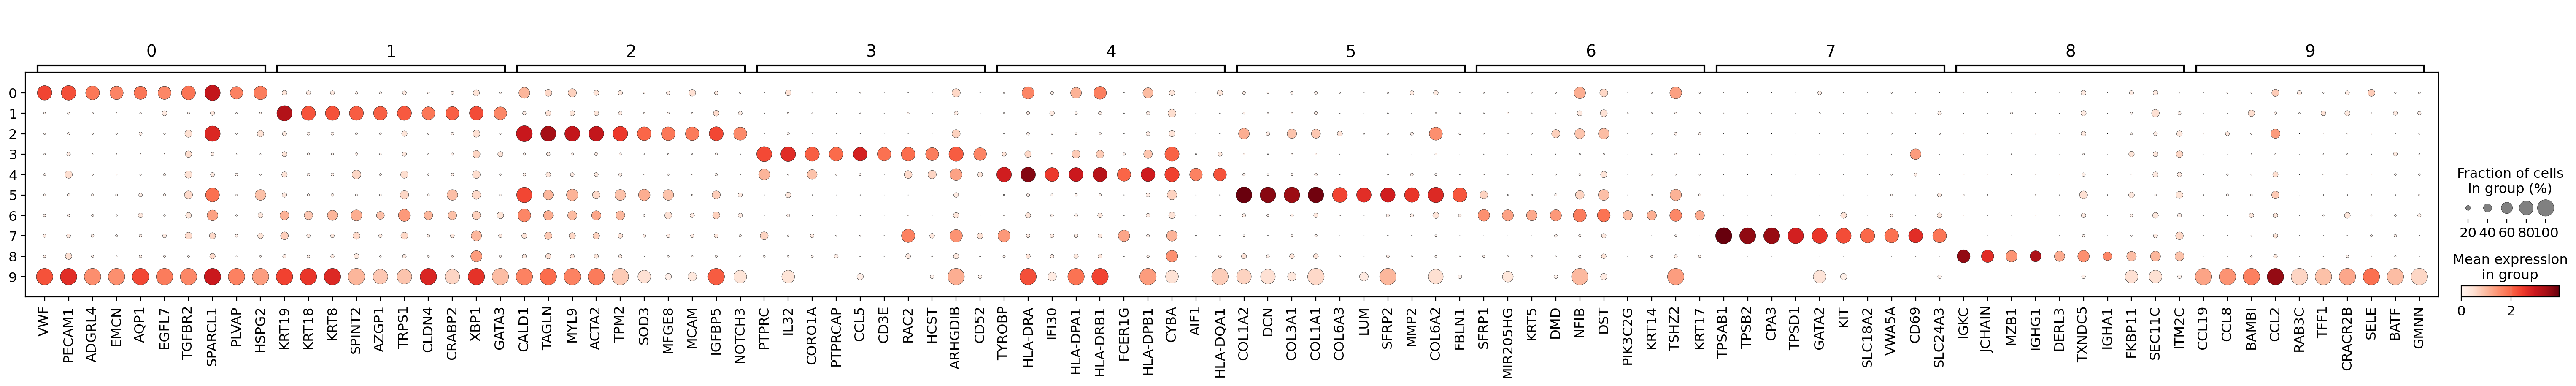

In [91]:
#sc.pl.rank_genes_groups(adata, key='rank_genes_groups_filtered')
sc.pl.rank_genes_groups_dotplot(adata, key='rank_genes_groups_filtered',dendrogram=False)

### 1.7 Enrichment

In [ ]:
# enrichment.R

In [93]:
import gseapy as gp
import decoupler as dc

In [98]:
enr = gp.enrichr(df_markers[df_markers['group'] == '2'].head(50)['names'],
                gene_sets=['Azimuth_2023'], organism='human', outdir=None)
enr.results.head(10)

Gene_set                                               Term Overlap  \
0  Azimuth_2023                             Liver-L2-Myofibroblast     8/9   
1  Azimuth_2023      Lung V2 (HLCA)-ann Finest level-Smooth Muscle     7/9   
2  Azimuth_2023           Lung V2 (HLCA)-ann Level 2-Smooth Muscle     7/9   
3  Azimuth_2023           Fetal Development-L1-Smooth Muscle Cells     5/9   
4  Azimuth_2023                           Adipose-L1-Smooth Muscle     5/9   
5  Azimuth_2023                  Lung v1-L2-Vascular Smooth Muscle     5/9   
6  Azimuth_2023           Lung V2 (HLCA)-ann Level 3-Fibromyocytes     4/9   
7  Azimuth_2023                    Lung v1-L2-Airway Smooth Muscle     4/9   
8  Azimuth_2023  Lung V2 (HLCA)-ann Finest level-SM Activated S...     4/9   
9  Azimuth_2023                                   Adipose-L2-hSMC1     4/9   

        P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
0  7.598906e-21      1.231023e-18            0                     0   
1  1.411006e-17      7.619431e-16            0                     0   
2  1.411006e-17      7.619431e-16            0                     0   
3  9.938176e-12      2.683307e-10            0                     0   
4  9.938176e-12      2.683307e-10            0                     0   
5  9.938176e-12      2.683307e-10            0                     0   
6  4.313297e-09      3.881967e-08            0                     0   
7  4.313297e-09      3.881967e-08            0                     0   
8  4.313297e-09      3.881967e-08            0                     0   
9  4.313297e-09      3.881967e-08            0                     0   

    Odds Ratio  Combined Score  \
0  3799.809524   176031.050269   
1  1623.674419    62997.989060   
2  1623.674419    62997.989060   
3   554.055556    14036.796742   
4   554.055556    14036.796742   
5   554.055556    14036.796742   
6   346.869565     6681.250083   
7   346.869565     6681.250083   
8   346.869565     6681.250083   
9   346.869565     6681.250083   

                                               Genes  
0  C11ORF96;ACTA2;NOTCH3;CALD1;FRZB;TPM1;NDUFA4L2...  
1          ACTA2;TAGLN;CALD1;TPM2;TPM1;NDUFA4L2;MYL9  
2              ACTA2;TAGLN;CALD1;TPM2;TPM1;SOD3;MYL9  
3                       PDGFRB;NOTCH3;RGS5;CALD1;BGN  
4                     TAGLN;CALD1;RCAN2;LMOD1;SORBS2  
5                       ACTA2;TAGLN;CALD1;TPM1;MYH11  
6                           PPP1R14A;TPM2;LMOD1;FLNA  
7                              ACTA2;FLNA;MYH11;MYL9  
8                                PLAC9;LBH;TPM2;FLNA  
9                           ACTA2;TAGLN;RCAN2;SORBS2

In [99]:
sc.queries.enrich(adata, group='2', org="hsapiens", gprofiler_kwargs = {'sources' : ['GO:CC']} )

source      native                                               name  \
0    GO:CC  GO:0005737                                          cytoplasm   
1    GO:CC  GO:0005829                                            cytosol   
2    GO:CC  GO:0012505                                endomembrane system   
3    GO:CC  GO:0031982                                            vesicle   
4    GO:CC  GO:0016020                                           membrane   
..     ...         ...                                                ...   
293  GO:CC  GO:0030131                           clathrin adaptor complex   
294  GO:CC  GO:0090543                                      Flemming body   
295  GO:CC  GO:0034663            endoplasmic reticulum chaperone complex   
296  GO:CC  GO:0031093                       platelet alpha granule lumen   
297  GO:CC  GO:0090575  RNA polymerase II transcription regulator complex   

           p_value  significant  \
0    4.940656e-324         True   
1    7.600739e-213         True   
2    6.700422e-193         True   
3    1.809908e-184         True   
4    1.672643e-162         True   
..             ...          ...   
293   3.297036e-02         True   
294   3.338714e-02         True   
295   4.484788e-02         True   
296   4.588768e-02         True   
297   4.606834e-02         True   

                                           description  term_size  query_size  \
0    "The contents of a cell excluding the plasma m...      12251        7414   
1    "The part of the cytoplasm that does not conta...       5457        7414   
2    "A collection of membranous structures involve...       4742        7414   
3    "Any small, fluid-filled, spherical organelle ...       3976        7414   
4    "A lipid bilayer along with all the proteins a...       9853        7414   
..                                                 ...        ...         ...   
293  "A membrane coat adaptor complex that links cl...         27        7414   
294  "A cell part that is the central region of the...         33        7414   
295  "A protein complex that is located in the endo...         11        7414   
296  "The volume enclosed by the membrane of the pl...         66        7414   
297  "A transcription factor complex that acts at a...        258        7414   

     intersection_size  effective_domain_size  precision    recall    query  \
0                 5698                  22090   0.768546  0.465105  query_1   
1                 2797                  22090   0.377259  0.512553  query_1   
2                 2469                  22090   0.333019  0.520666  query_1   
3                 2140                  22090   0.288643  0.538229  query_1   
4                 4262                  22090   0.574858  0.432559  query_1   
..                 ...                    ...        ...       ...      ...   
293                 19                  22090   0.002563  0.703704  query_1   
294                 22                  22090   0.002967  0.666667  query_1   
295                 10                  22090   0.001349  0.909091  query_1   
296                 37                  22090   0.004991  0.560606  query_1   
297                115                  22090   0.015511  0.445736  query_1   

                      parents  
0    [GO:0005622, GO:0110165]  
1    [GO:0005737, GO:0110165]  
2                [GO:0110165]  
3                [GO:0043227]  
4                [GO:0110165]  
..                        ...  
293  [GO:0030118, GO:0030119]  
294  [GO:0030496, GO:0110165]  
295              [GO:0140534]  
296  [GO:0031091, GO:0034774]  
297  [GO:0005667, GO:0140513]  

[298 rows x 14 columns]

## 2 After annotation

### 2.1 Cell state composition

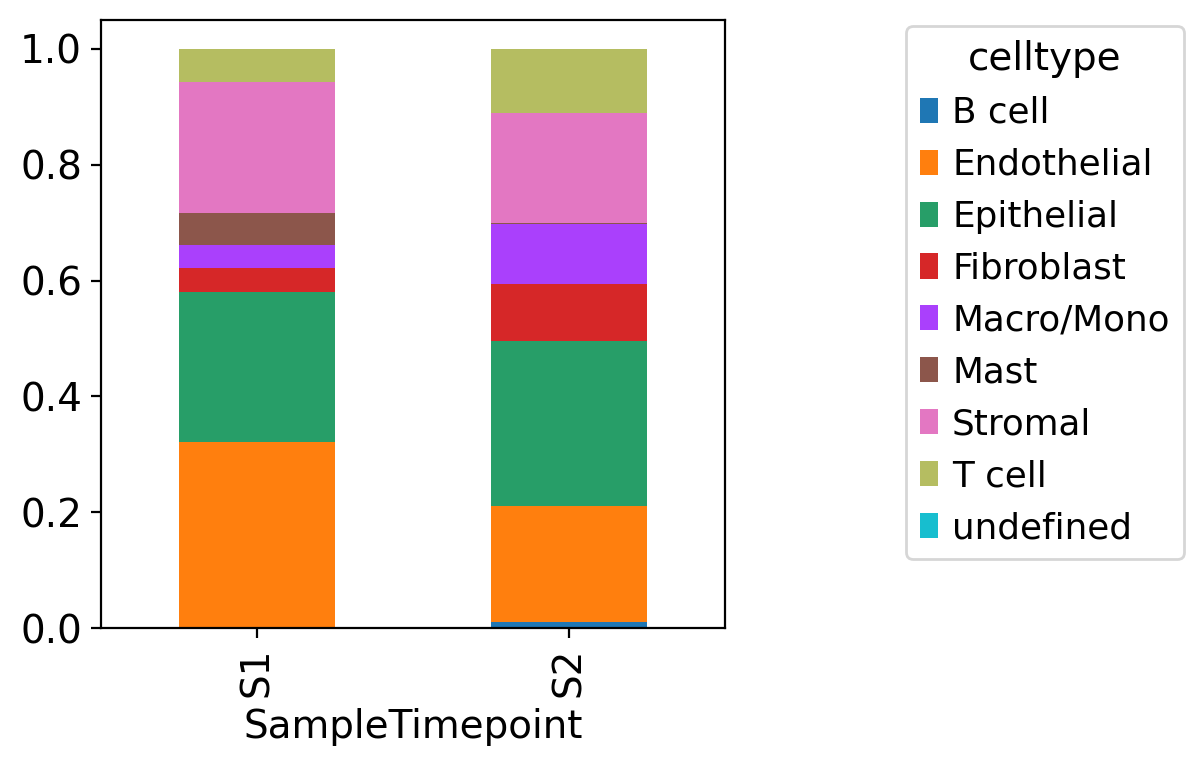

In [135]:
tmp = pd.crosstab(adata.obs['manual_celltype_annotation'],adata.obs['SampleTimepoint'], normalize='columns').T.plot(kind='bar', stacked=True,figsize = (4,4))
plt.grid(False)
tmp.legend(title='celltype', bbox_to_anchor=(1.26, 1.02),loc='best')

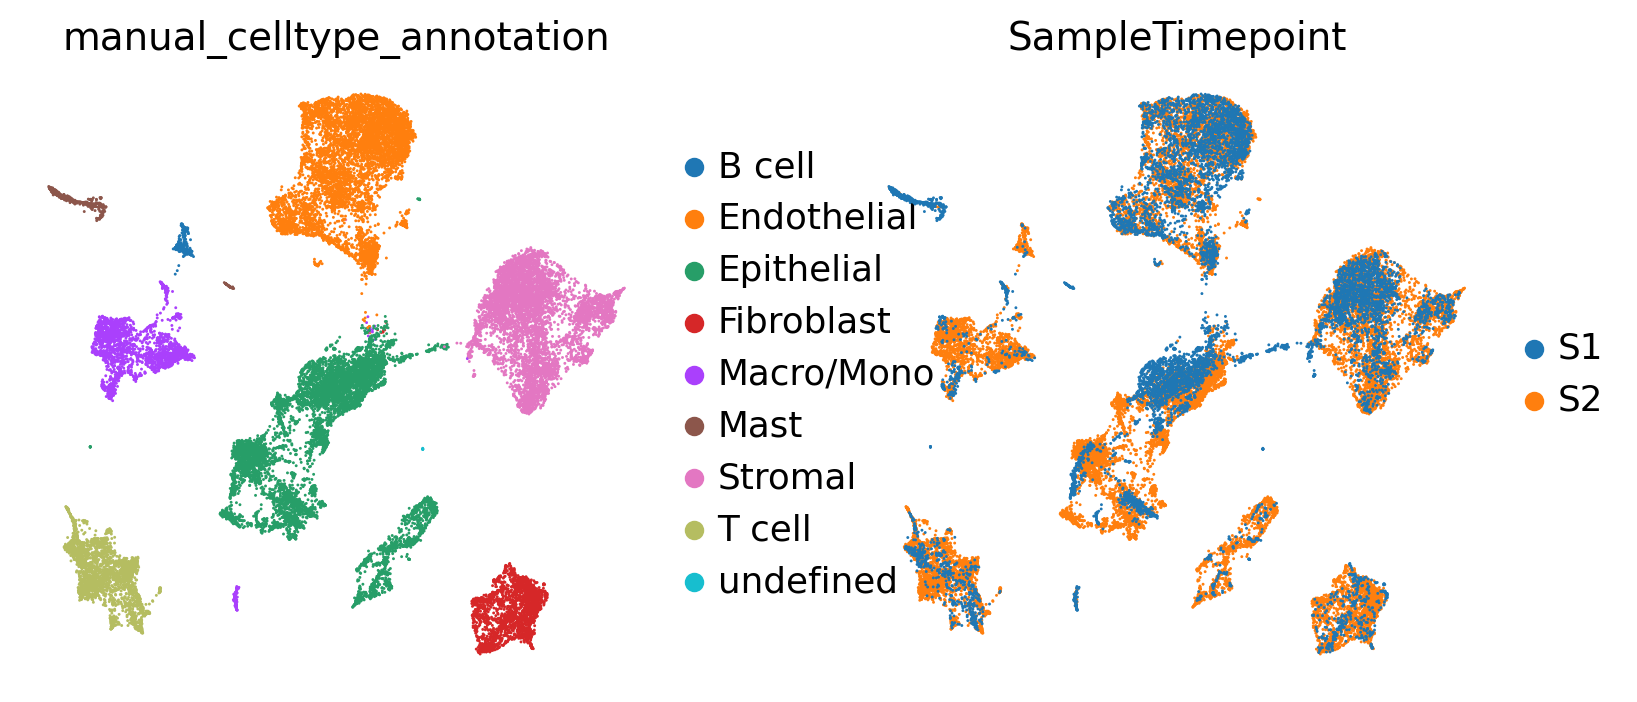

In [136]:
sc.pl.umap(adata, color=["manual_celltype_annotation", "SampleTimepoint"], frameon=False, ncols=2)

In [ ]:
# stackbarplot.R
# swarmplot.R

### 2.2 Tumor cell

#### 2.2.1 cNMF expression meta-program

In [ ]:
# cNMF.sh
# meta-program.R

#### 2.2.2 UPhyloplot2 evolutionary based on CNV

In [ ]:
# uphyloplot2
# python /home/zhepan/Software/uphyloplot2/uphyloplot2.py

### 2.3 Cell communication

#### 2.3.1 CellChat

In [ ]:
# cellchat.R

#### 2.3.2 Cellphonedb

#### 2.3.3 Nichenet

### 2.4 Trajectory

#### 2.4.1 cellrank based on scVelo

In [ ]:
# cellrank.ipynb

#### 2.4.2 Monocle

In [ ]:
# monocle3.R

#### 2.4.3 Slingshot

In [ ]:
# slingshot.R

#### 2.4.4 Diffuse


In [ ]:
# destiny.R

In [ ]:
sc.tl.diffmap(adata)
sc.pl.diffmap(adata, color='celltype')

#### 2.4.5 cytotrace

### 2.5 TF

#### 2.5.1 pySCENIC

In [ ]:
# pyscenic.sh

### 2.6 Metabolism

#### 2.6.1 pathway score

In [ ]:
# enrichment.R

#### 2.6.2 Compass

In [ ]:
# compass.sh

### 2.7 Mulitmodal including ATAC and spatial

### 2.8 Immune receptor repertoire


#### 2.8.1 CoNGA

In [ ]:
# conga.ipynb

#### 2.8.2 scRepertoire

In [ ]:
# ImmuneRep.R

### 2.9 Bulk deconvolution

### 2.10 GWAS

#### 2.10.1 sc-linker

In [ ]:
# ref: Identifying disease-critical cell types and cellular processes by integrating single-cell RNA-sequencing and human genetics

#### 2.10.2 scDRS